# Import Libaries

In [ ]:
import optuna
import optuna.visualization as vis
HORIZON = 24

#storage = "sqlite:///Versuch3_ConvLSTM_CustomScore.db"
model = "RandomForest" # LGBM, SVR, Linear, XGBoost, RandomForest, ConvLSTM_CustomScore, ConvLSTM_Regression

storage = f"sqlite:///Versuch3_{model}.db" # Versuch1_ConvLSTM_CustomScore
#storage = "sqlite:///Versuch1_ConvLSTM_CustomScore.db"


storage = "sqlite:///Versuch3_ConvLSTM_CustomScore_cv_light_mode=False.db"
#storage = "sqlite:///Versuch3_ConvLSTM_Regression_cv_light_mode=False.db"
#storage = "sqlite:///Versuch3_ConvLSTM_Regression_cv_light_mode=True.db"
#storage = "sqlite:///Versuch3_ConvLSTM_CustomScore_cv_light_mode=True.db"

#study_name = f"{1}"
study_name = f"{HORIZON}"


# open study
study = optuna.load_study(
    storage=storage,
    study_name=study_name,
)




def plot_study(study):
    print("====== Study Summary ====")
    print(f"Number of trials: {len(study.trials)}")
    # visualize the study
    vis.plot_optimization_history(study).show()
    vis.plot_param_importances(study).show()
    vis.plot_slice(study).show()
    vis.plot_parallel_coordinate(study).show()
    # params_to_show = [
    # "cnn1_out_channels_cat",
    # "cnn2_out_channels_cat",
    # "cnn_linear_out_features_cat",
    # "lstm_input_size_cat",
    # "lstm_hidden_dim_cat",
    # "lstm_layers",
    # "dropout",
    # "lr",
    # "batch_size",
    # ]
    #vis.plot_parallel_coordinate(study, params=params_to_show).show()

    #vis.plot_contour(study).show()
    #vis.plot_edf(study).show()
    #vis.plot_intermediate_values(study).show()
    return None


best_params = study.best_params


print("Verwende beste Parameter:", best_params)
print("Beste Trial:", study.best_trial)
print("Beste Trial Value:", study.best_trial.value)
plot_study(study)



Verwende beste Parameter: {'cnn1_out_channels_cat': 64, 'cnn2_out_channels_cat': 512, 'cnn_linear_out_features_cat': 512, 'cnn1_kernel_size_cat': 3, 'cnn2_kernel_size_cat': 3, 'cnn1_padding_cat': 1, 'cnn2_padding_cat': 1, 'lstm_input_size_cat': 512, 'lstm_hidden_dim_cat': 256, 'lstm_layers': 3, 'dropout': 0.6095536421376531, 'lr': 0.00022886081963834897, 'batch_size': 128, 'patience': 45, 'reduce_lr_patience': 12}
Beste Trial: FrozenTrial(number=141, state=1, values=[0.4291961277160368], datetime_start=datetime.datetime(2025, 8, 16, 2, 20, 1, 137180), datetime_complete=datetime.datetime(2025, 8, 16, 8, 43, 18, 793729), params={'cnn1_out_channels_cat': 64, 'cnn2_out_channels_cat': 512, 'cnn_linear_out_features_cat': 512, 'cnn1_kernel_size_cat': 3, 'cnn2_kernel_size_cat': 3, 'cnn1_padding_cat': 1, 'cnn2_padding_cat': 1, 'lstm_input_size_cat': 512, 'lstm_hidden_dim_cat': 256, 'lstm_layers': 3, 'dropout': 0.6095536421376531, 'lr': 0.00022886081963834897, 'batch_size': 128, 'patience': 45, 

[W 2025-08-21 17:01:48,987] Trial 42 is omitted in visualization because its objective value is inf or nan.


[W 2025-08-21 17:01:50,208] Trial 42 is omitted in visualization because its objective value is inf or nan.


[W 2025-08-21 17:01:50,293] Trial 42 is omitted in visualization because its objective value is inf or nan.


In [3]:
dd

NameError: name 'dd' is not defined

# Versuch 3 DL

In [5]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error, recall_score, precision_score, f1_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from utils.dl_helper_functions import (
    convert_to_tensors,
    create_sequences,
    load_picture_lagged_data,
    scale_data,
)
from utils.Model_Training import training_ConvLSTM_Regression_Classification
import torch
import joblib
import time
from utils.Model_ConvLSTM import CNNLSTM_Regression_Classification, CNNLSTM_Regression

# === SETTINGS ===
DTYPE_NUMPY = np.float32
HORIZON = 24
SEQUENCE_LENGTH = 24
n_jobs = -1

classification = False
light_mode = False

if classification:
    print("Classification Mode: Using custom score with bins [1, 2.00]")
else:
    print("Regression Mode: Using mean squared error as loss function")

if light_mode:
    print("Light Mode: Using reduced dataset for faster training")
else:
    print("Full Mode: Using full dataset for training")

if classification:
    storage = f"sqlite:///Versuch3_ConvLSTM_CustomScore_cv_light_mode={light_mode}.db"  # Speicherort für Optuna Studien
else:
    storage = f"sqlite:///Versuch3_ConvLSTM_Regression_cv_light_mode={light_mode}.db"


# BackUP Storage: 
# if classification:
#     storage = "sqlite:///Versuch3_ConvLSTM_CustomScore.db" # Versuch3_ConvLSTM_Regression.db
# else:
#     storage = "sqlite:///Versuch3_ConvLSTM_Regression.db"

study_name = f"{HORIZON}"

# print which device is used
if torch.cuda.is_available():
    print("Using GPU:", torch.cuda.get_device_name(0))
    gpu_name = torch.cuda.get_device_name(0)
else:
    gpu_name = "CPU"
    print("Using CPU")



# Load data
X, y_lagged, y, common_time = load_picture_lagged_data(
    return_common_time=True,
    verbose=False,
    grid_size=25,
    n_jobs=n_jobs,
    dtype=DTYPE_NUMPY,
    pca=False,
    keep_ocean_data=True,
    land_values=0.0,
    light_mode=light_mode
)

# Train Final Model on All Data but leave out Surge4


X = X.astype(DTYPE_NUMPY)
y_lagged = y_lagged.astype(DTYPE_NUMPY)
y = y.astype(DTYPE_NUMPY)

Regression Mode: Using mean squared error as loss function
Full Mode: Using full dataset for training
Using CPU

Dropping columns: ['snowfall', 'siconc', 'rain', 'sithick', 'precipitation', 'weather_code', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_high', 'cloud_cover_mid', 'vapour_pressure_deficit', 'et0_fao_evapotranspiration', 'relative_humidity_2m', 'temperature_2m', 'dew_point_2m', 'apparent_temperature', 'mlotst']

Shapes of DataFrames after dropping columns:
Ocean DataFrame: (9415187, 11)
Weather DataFrame: (2018400, 8)
Insitu DataFrame: (20161, 2)


Interpolating wo: 100%|██████████| 20161/20161 [00:02<00:00, 7633.02it/s]


{'cnn1_out_channels_cat': 128, 'cnn2_out_channels_cat': 512, 'cnn_linear_out_features_cat': 256, 'cnn1_kernel_size_cat': 3, 'cnn2_kernel_size_cat': 3, 'cnn1_padding_cat': 1, 'cnn2_padding_cat': 1, 'lstm_input_size_cat': 512, 'lstm_hidden_dim_cat': 512, 'lstm_layers': 3, 'dropout': 0.22589464322173108, 'lr': 0.0008642484674089188, 'batch_size': 256, 'patience': 40, 'reduce_lr_patience': 9, 'epochs': 1000}

=== Fold: Surge1 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


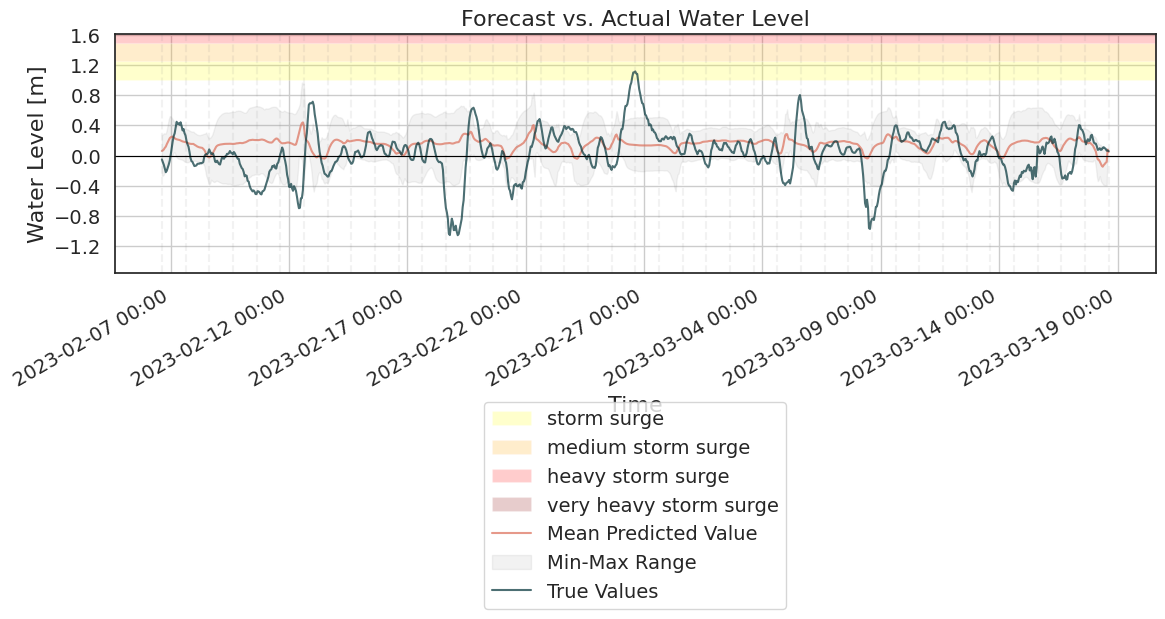

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.21795253 0.25652385 0.21003859 0.236553   0.21146378 0.2219664
 0.206648   0.26665625 0.21261057 0.26568416 0.27627665 0.2373746
 0.25458515 0.23894747 0.30916244 0.274915   0.26431802 0.26278988
 0.2573332  0.286465   0.31111616 0.29759887 0.31591687 0.3422976 ]
Mean Absolute Error: 0.25979975


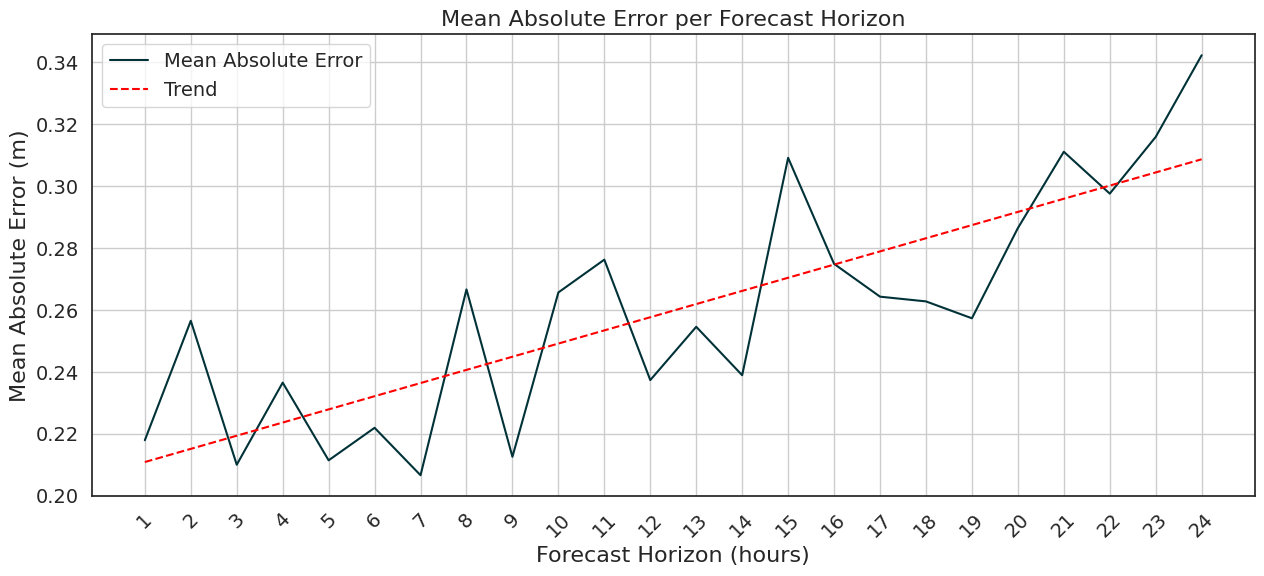

Number of blocks: 961, HORIZON: 24


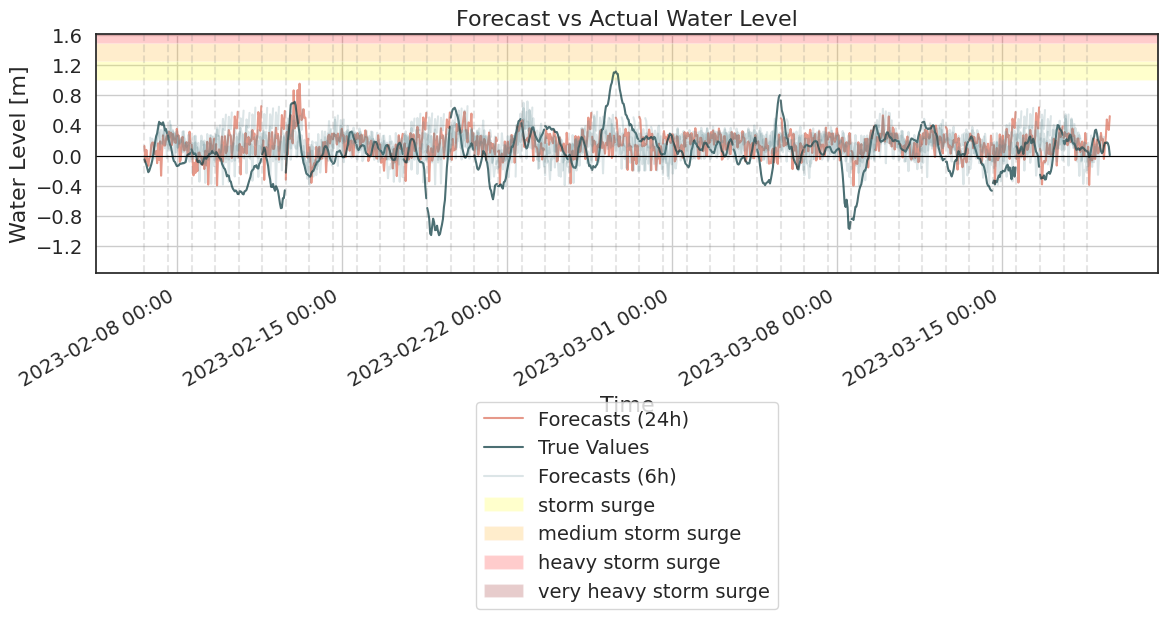


=== Fold: Surge2 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


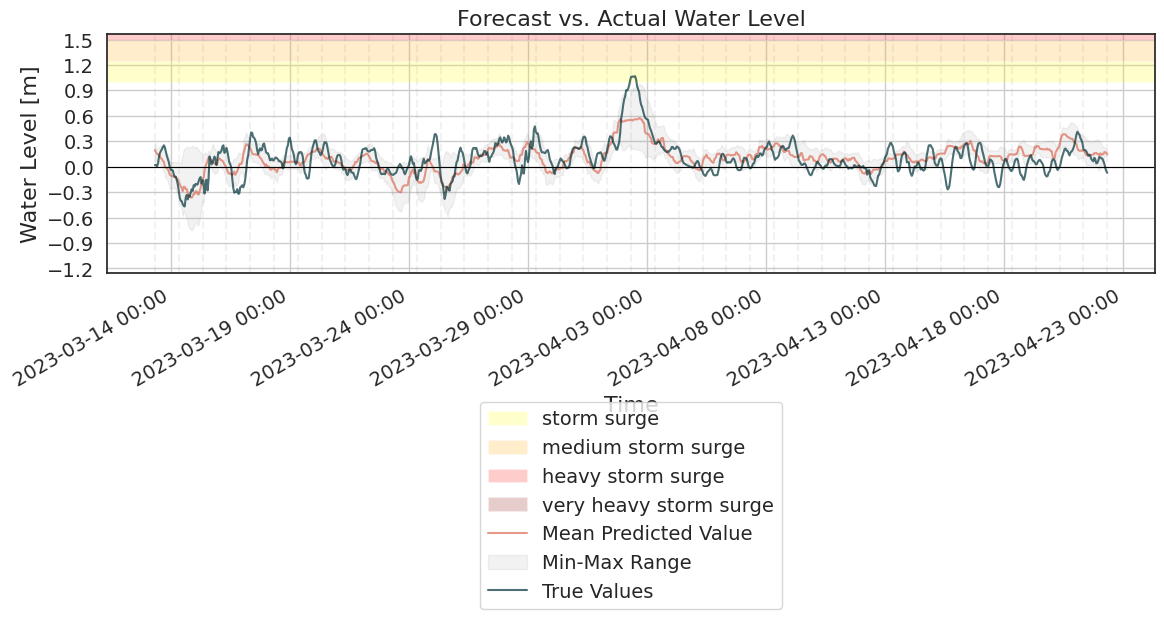

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.14189485 0.12297469 0.14353932 0.12642184 0.12089895 0.1287806
 0.12290468 0.12378545 0.12999797 0.12239201 0.13046557 0.12963936
 0.13333124 0.13173917 0.136349   0.13285714 0.13349426 0.1410091
 0.13366471 0.1441091  0.1344893  0.15906659 0.16463423 0.14180532]
Mean Absolute Error: 0.13459352


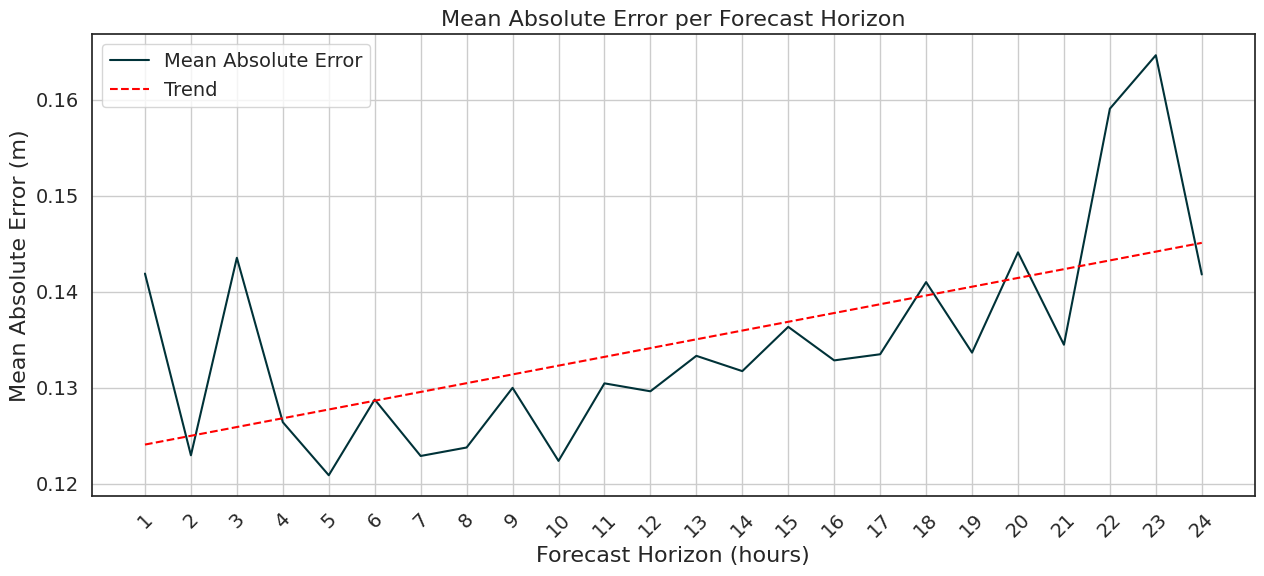

Number of blocks: 961, HORIZON: 24


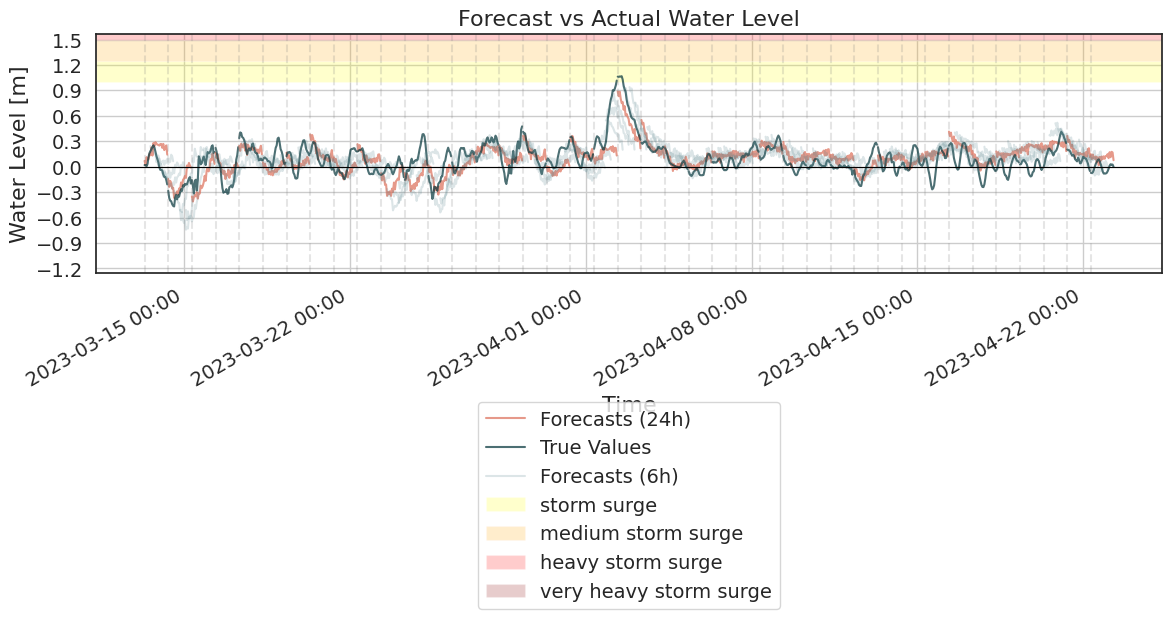


=== Fold: Surge3 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


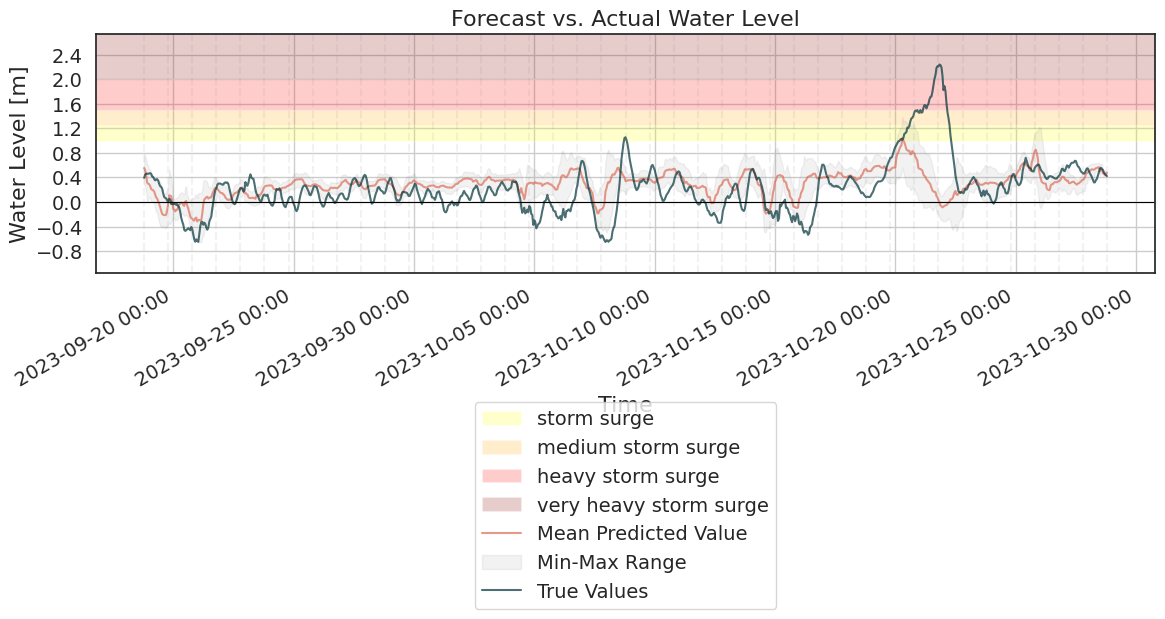

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.21875986 0.21795645 0.23738582 0.20576279 0.22302128 0.23927441
 0.21829517 0.2499243  0.24696983 0.26938093 0.2578747  0.26094064
 0.26671073 0.24065857 0.31511843 0.32556474 0.29367134 0.29287815
 0.31020612 0.3023569  0.28858227 0.31358853 0.29731077 0.29043058]
Mean Absolute Error: 0.26594266


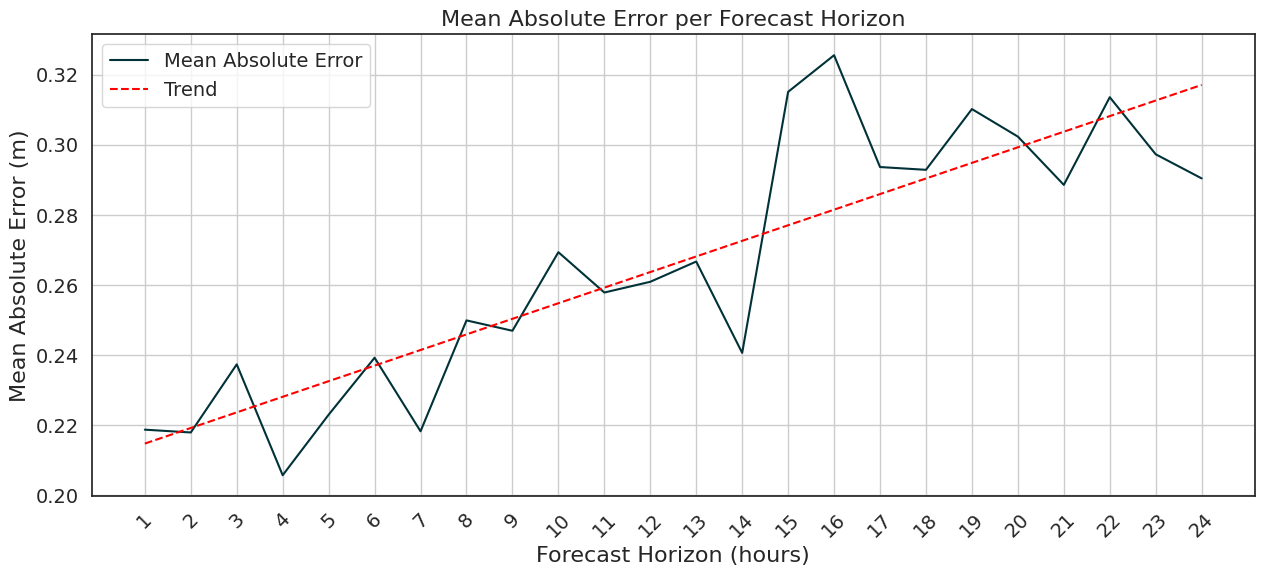

Number of blocks: 961, HORIZON: 24


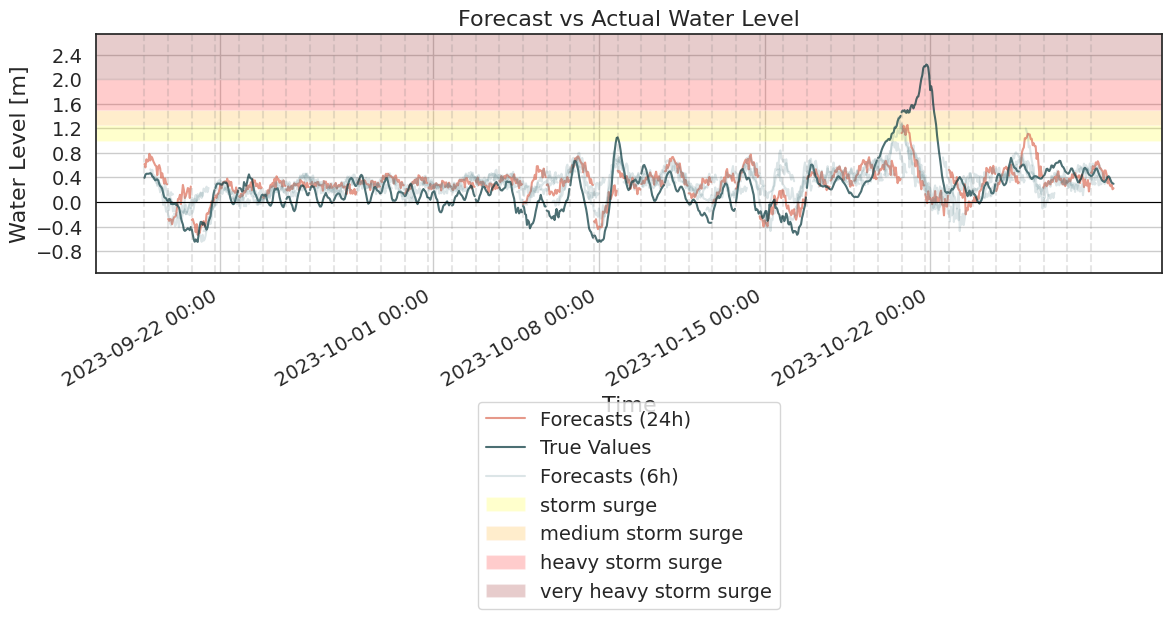


=== Fold: Surge4 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


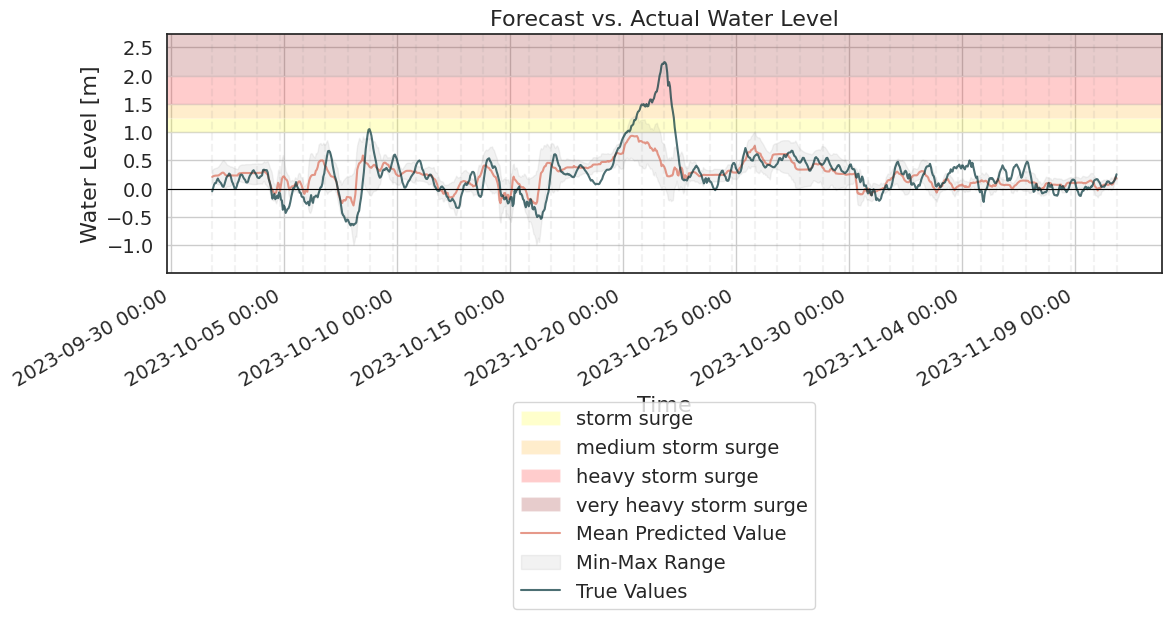

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.19183467 0.20510064 0.16720764 0.18730822 0.19771354 0.17021336
 0.20001143 0.16950224 0.16680866 0.17819296 0.18449359 0.19793922
 0.20808434 0.21334341 0.20886312 0.21558815 0.2239829  0.23128451
 0.23446073 0.2402183  0.2667227  0.259842   0.25561213 0.2582108 ]
Mean Absolute Error: 0.20968914


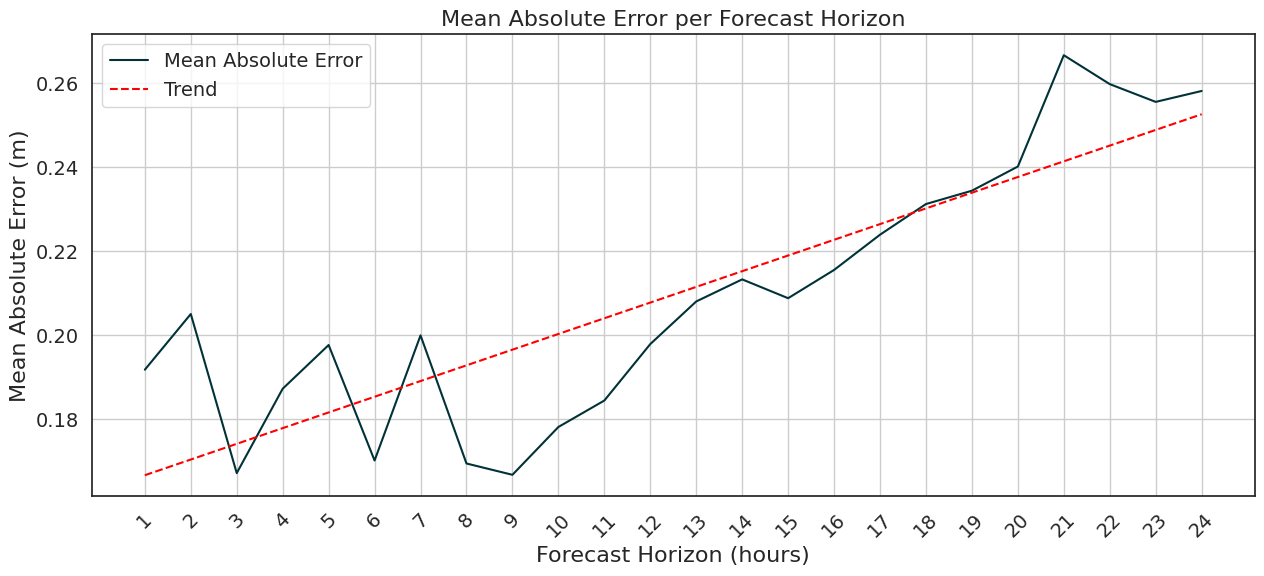

Number of blocks: 961, HORIZON: 24


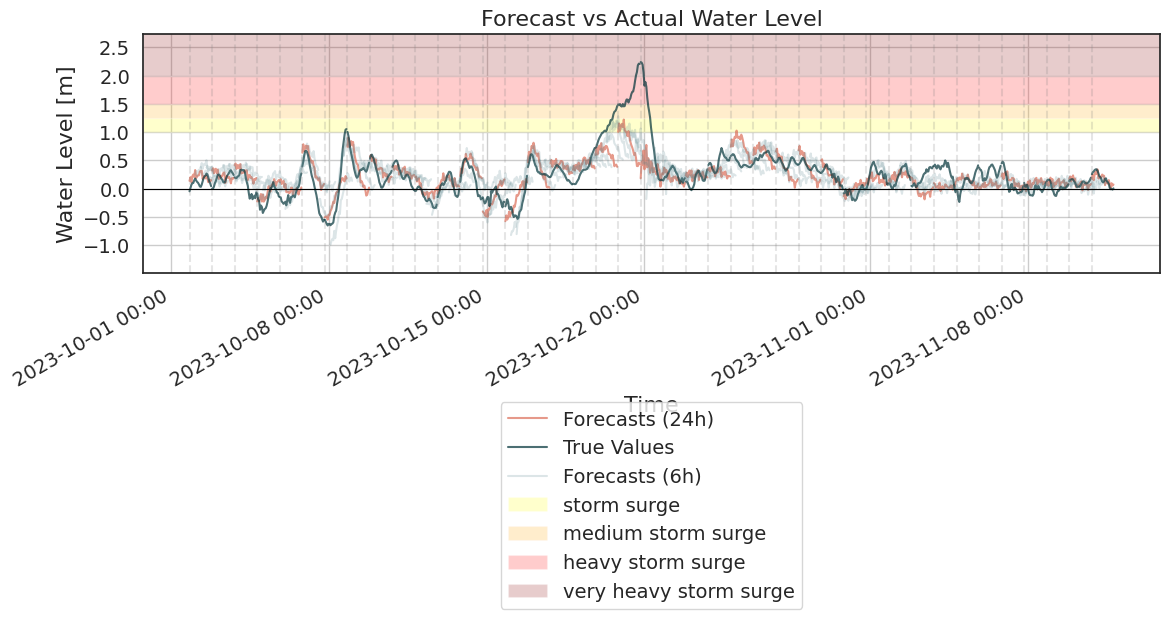


=== Fold: Surge5 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


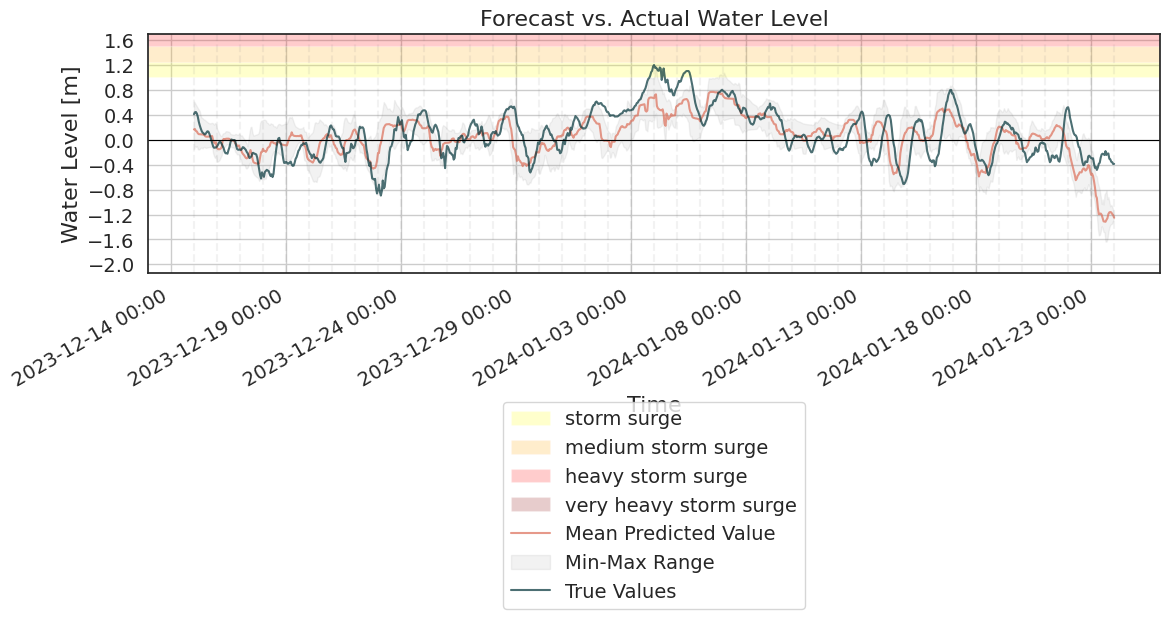

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.19781454 0.18226533 0.21616136 0.18720078 0.2044098  0.18953304
 0.1836045  0.1905453  0.19087754 0.18058625 0.19475262 0.1877079
 0.19146916 0.20027591 0.21227553 0.21510917 0.23308784 0.23172717
 0.24533775 0.26281857 0.26886633 0.28623173 0.29177025 0.29711714]
Mean Absolute Error: 0.21839774


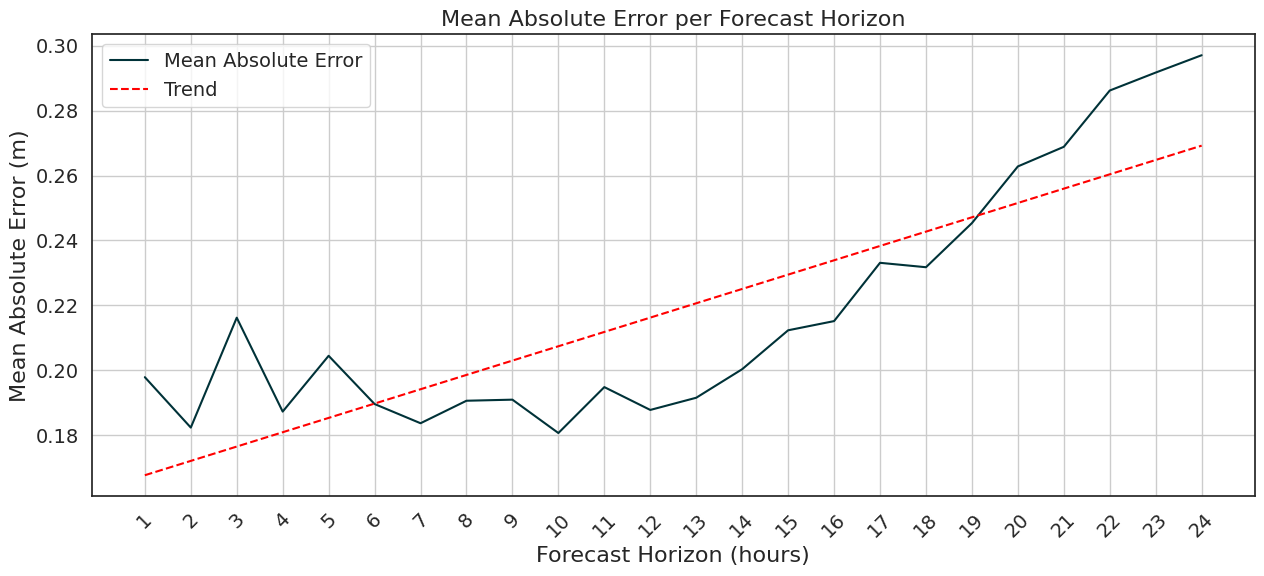

Number of blocks: 961, HORIZON: 24


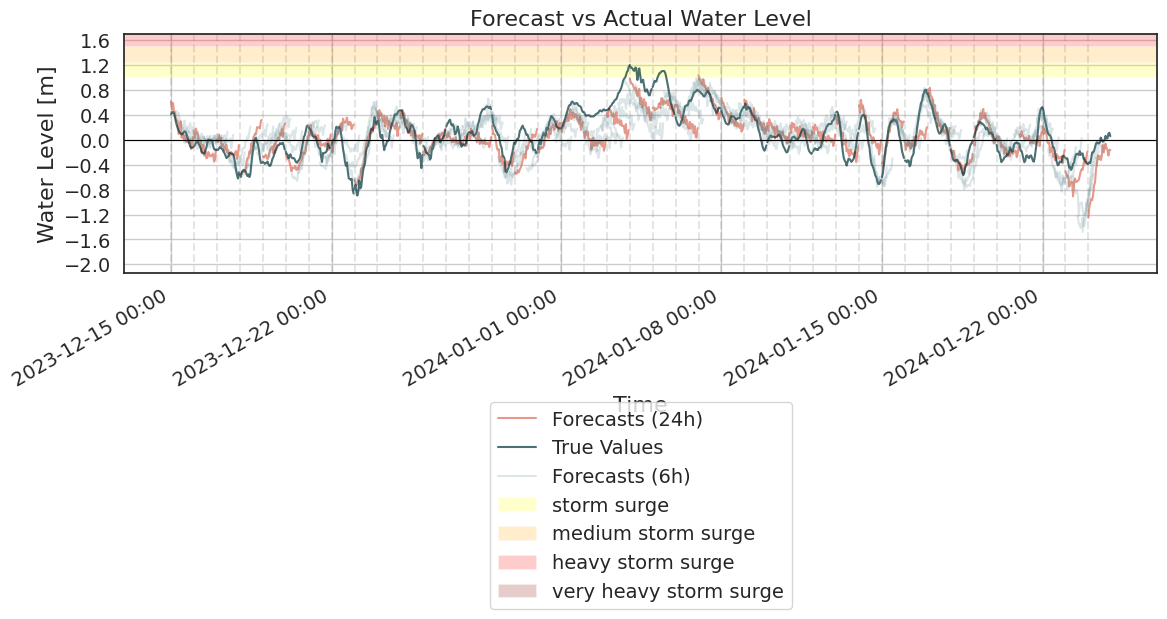


=== Fold: Surge6 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


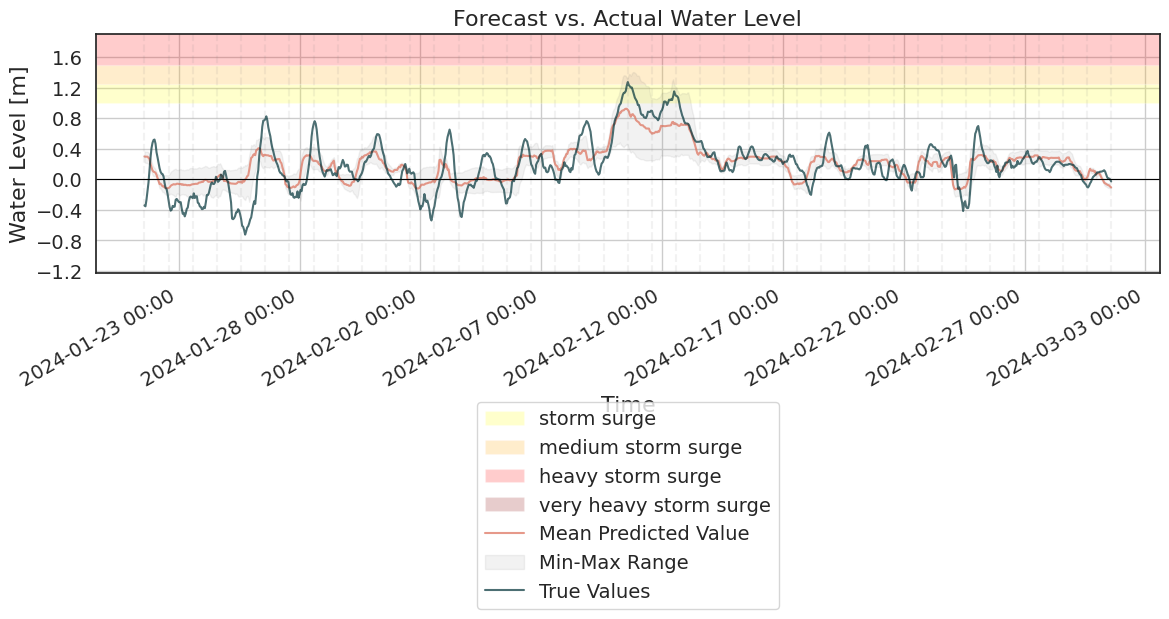

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.14386913 0.14945307 0.15882269 0.15266278 0.14009681 0.1483848
 0.14392737 0.14052232 0.14479241 0.14494877 0.15282957 0.16052082
 0.16685133 0.17643073 0.18150237 0.19352278 0.19999155 0.20481335
 0.21403122 0.21520191 0.21766663 0.22524111 0.22861855 0.23026249]
Mean Absolute Error: 0.17645685


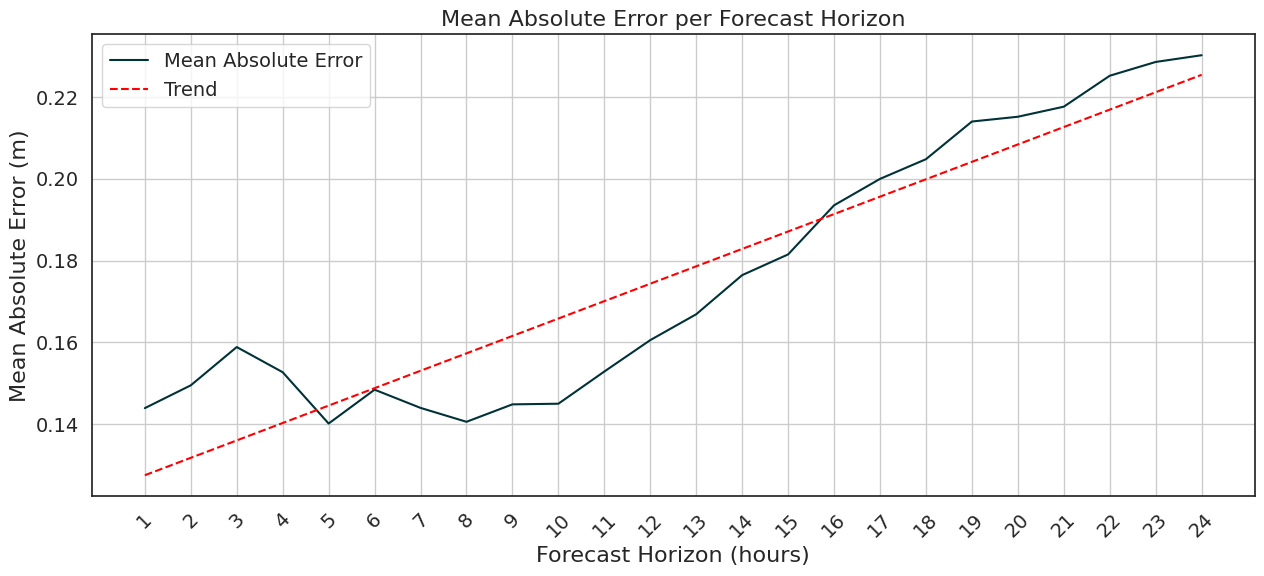

Number of blocks: 961, HORIZON: 24


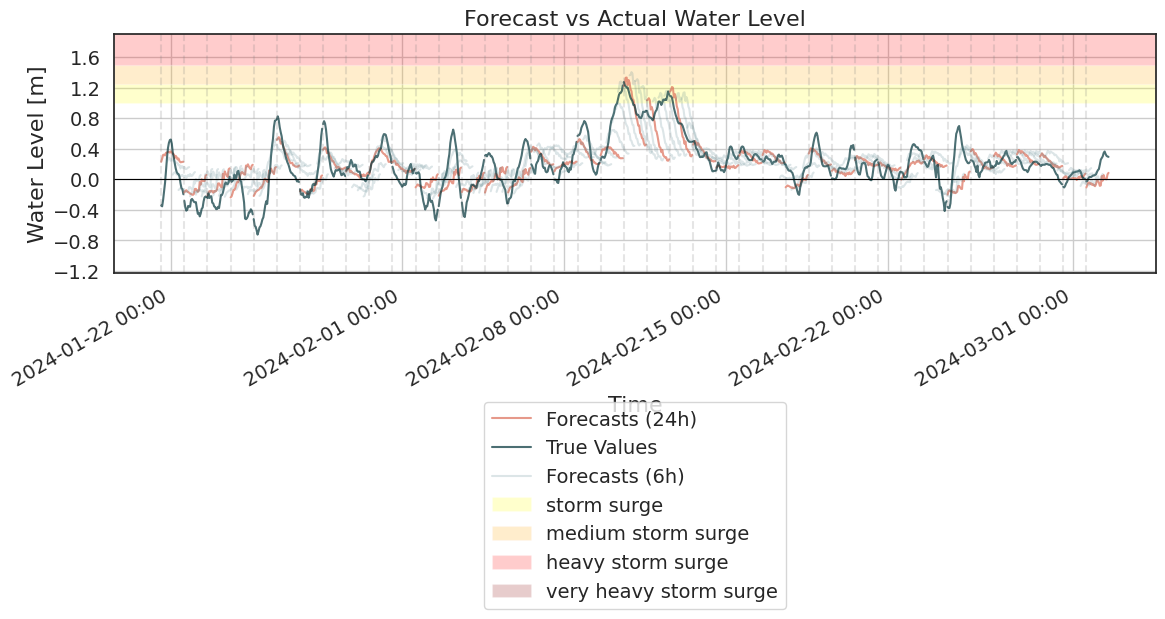


=== Fold: Surge7 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


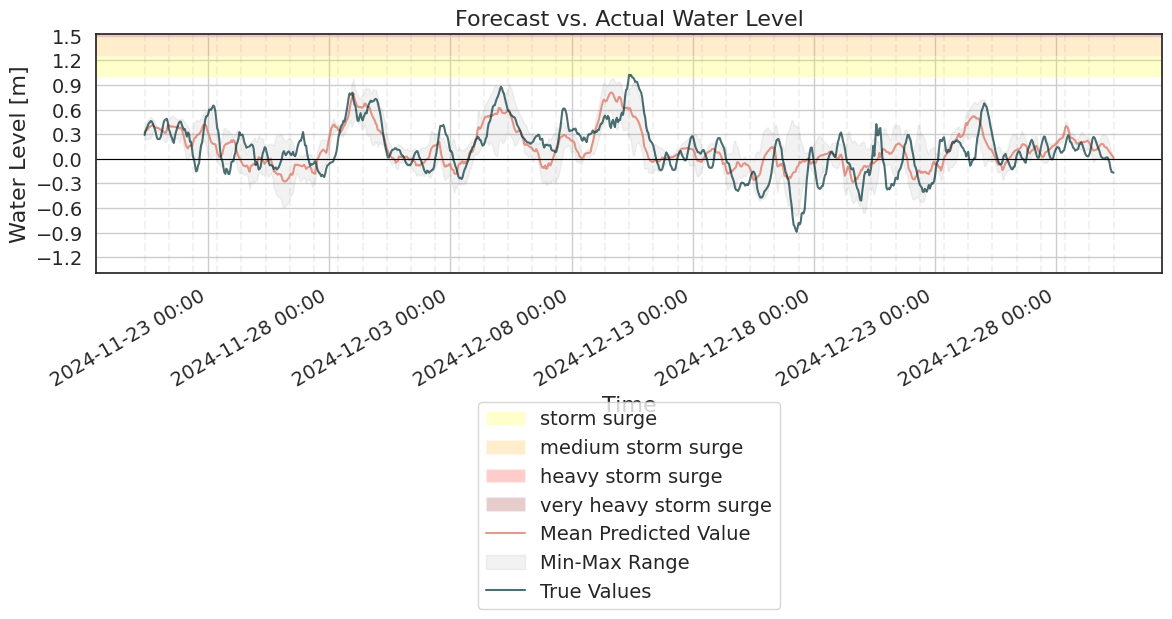

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.13010244 0.12867072 0.13025779 0.13649009 0.13457987 0.1374586
 0.14012042 0.14260054 0.14445041 0.14485268 0.1483678  0.14751618
 0.14878878 0.15199983 0.1580772  0.16217212 0.17180002 0.17102386
 0.1777732  0.18504675 0.1950107  0.19932747 0.20449543 0.21252464]
Mean Absolute Error: 0.1584795


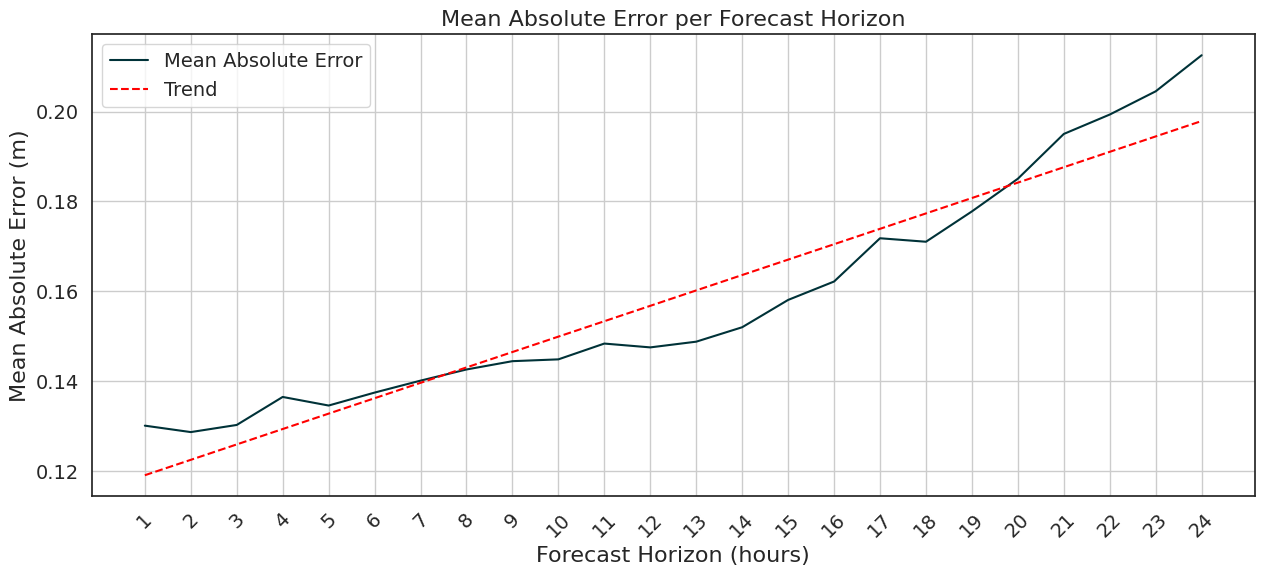

Number of blocks: 961, HORIZON: 24


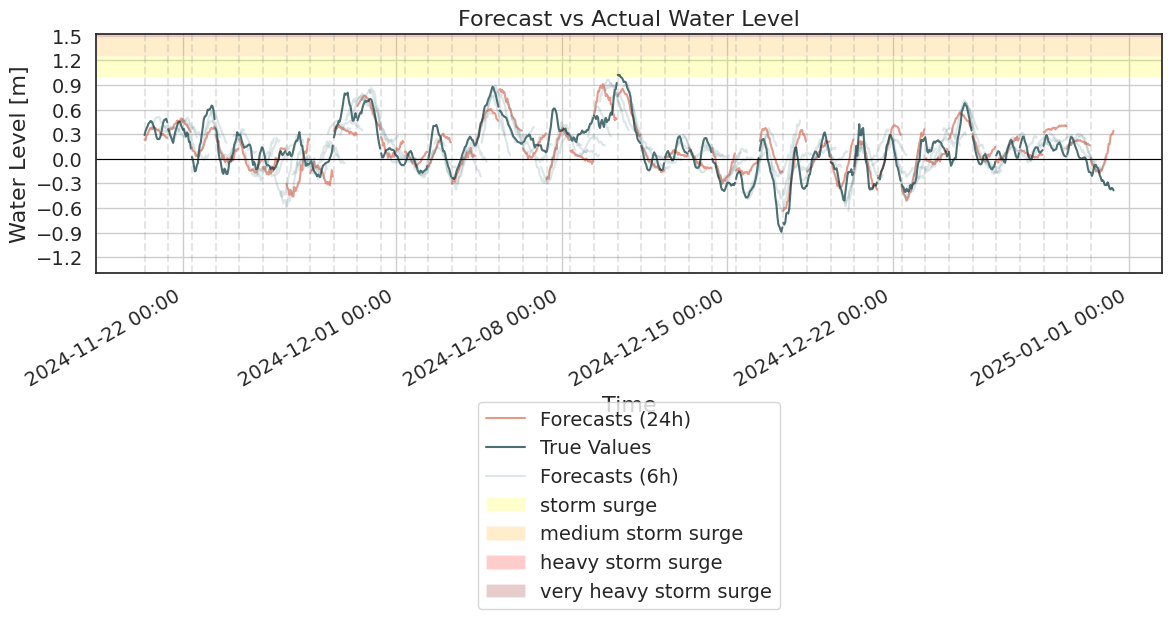


=== Fold: normal1 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


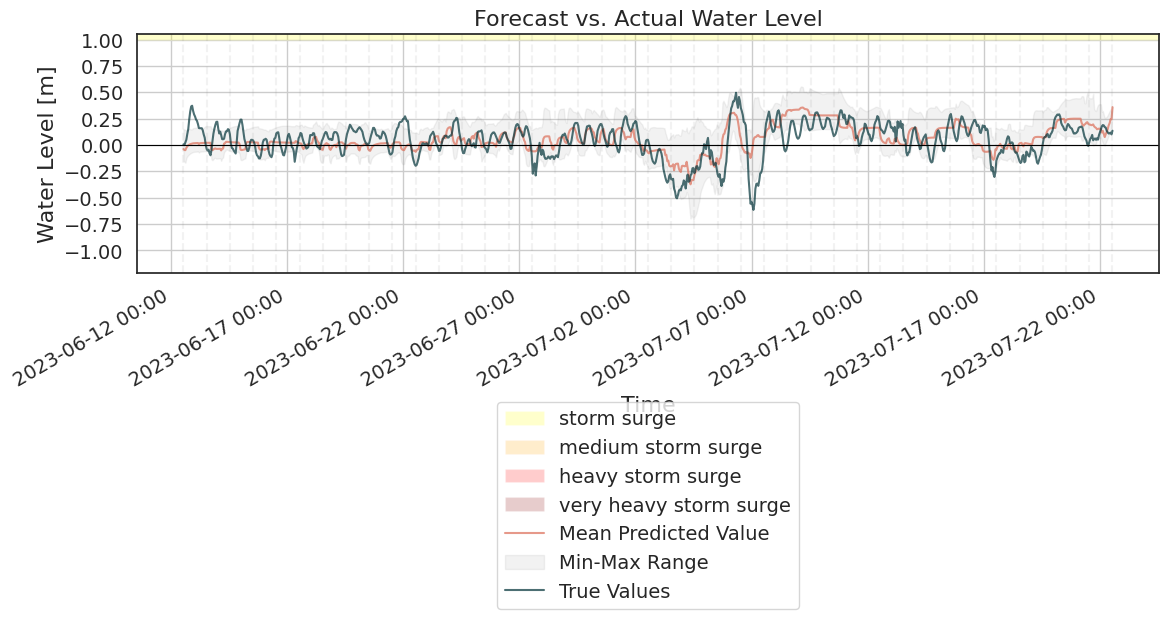

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.16831504 0.11488076 0.10736017 0.09790525 0.1114436  0.10786478
 0.1063515  0.11836017 0.12476736 0.11448598 0.1099118  0.12641045
 0.11684906 0.1169427  0.13142546 0.12511083 0.12039173 0.13005643
 0.12158911 0.11936703 0.19257337 0.11807739 0.12066977 0.13651553]
Mean Absolute Error: 0.123234384


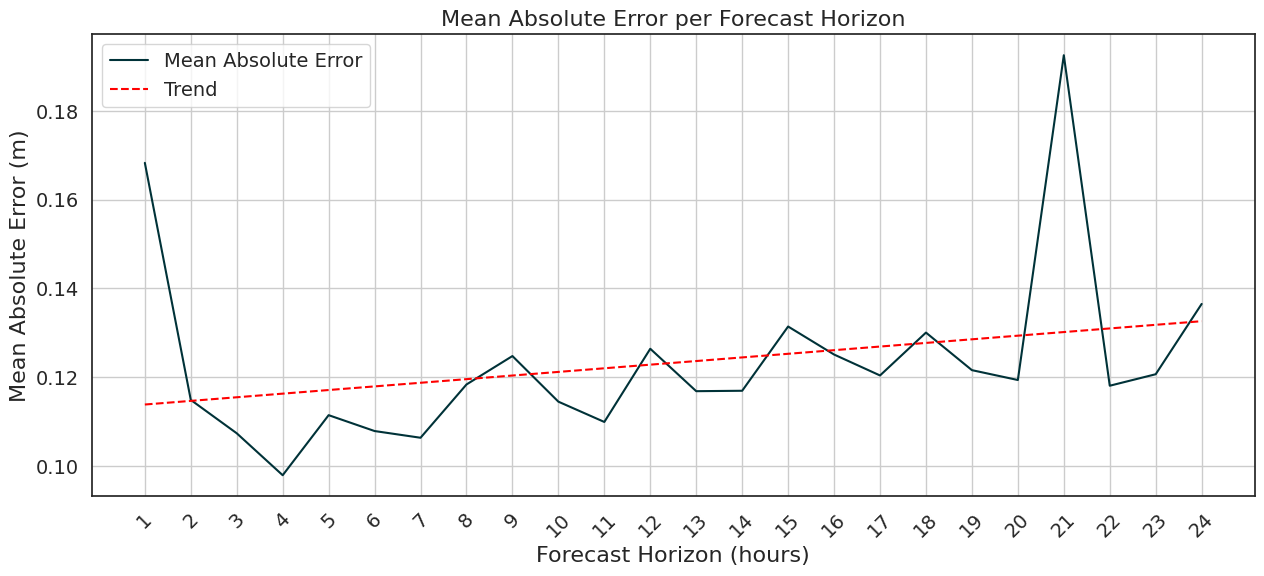

Number of blocks: 961, HORIZON: 24


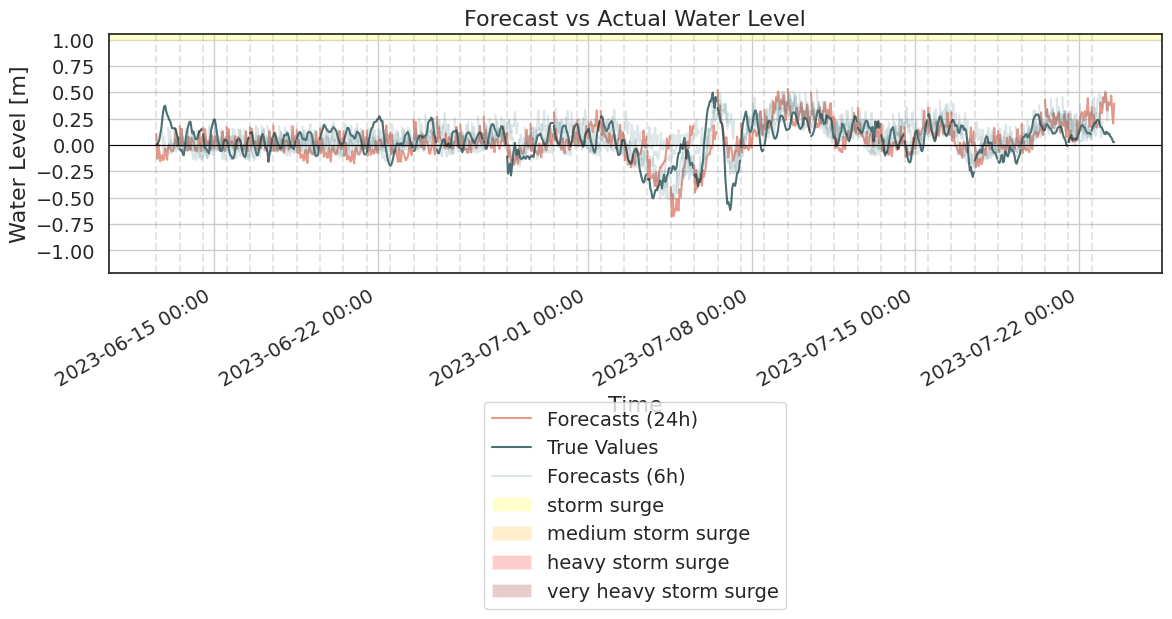


=== Fold: normal2 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


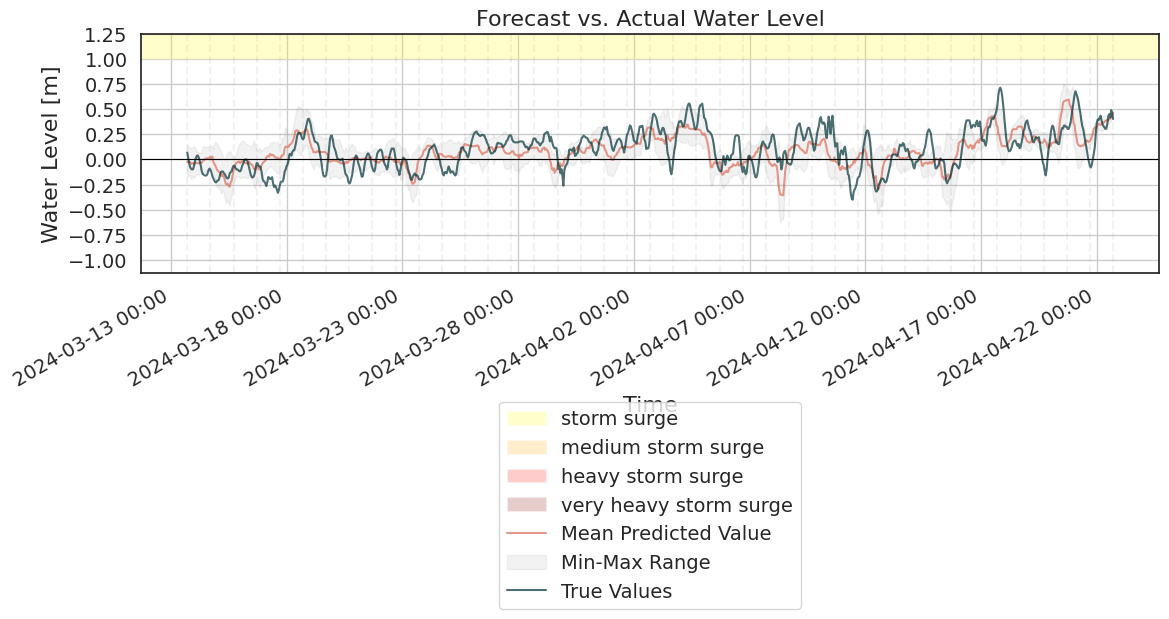

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.11123428 0.10316138 0.10163067 0.09844775 0.1022131  0.09393124
 0.09572151 0.10188223 0.10088603 0.1075515  0.13792984 0.1124284
 0.11795335 0.12505776 0.12302537 0.12962332 0.13542321 0.14367907
 0.13818415 0.1463399  0.16743794 0.13980974 0.14339244 0.13938773]
Mean Absolute Error: 0.12151382


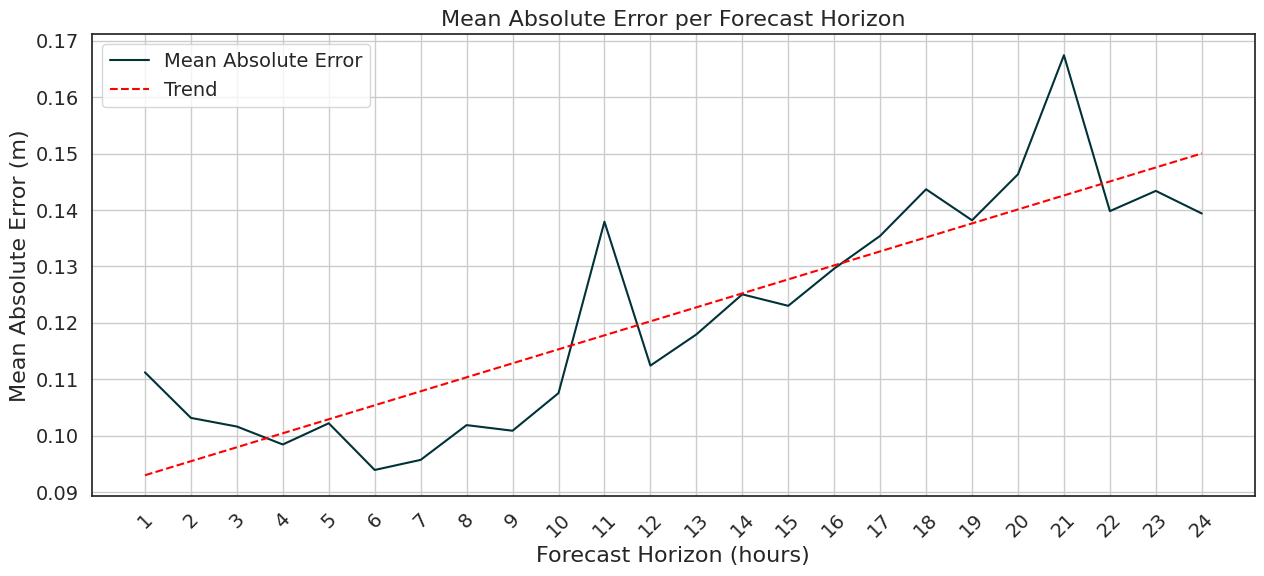

Number of blocks: 961, HORIZON: 24


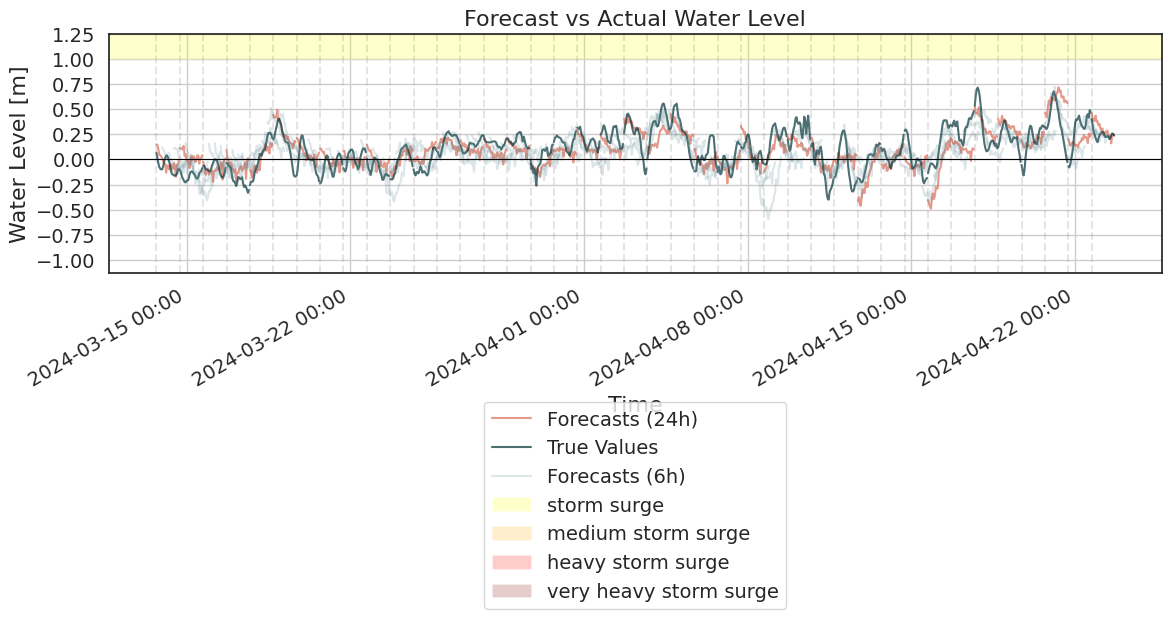


=== Fold: normal3 ===
X_test shape: (961, 24, 13, 25, 25), y_lagged_test shape: (961, 24, 24), y_test shape: (961, 24)
X_test_sc shape: (961, 24, 13, 25, 25), y_lagged_test_sc shape: (961, 24, 24), y_test shape: (961, 24)
X_train_sc shape: (18699, 24, 13, 25, 25), y_lagged_train_sc shape: (18699, 24, 24), y_train shape: (18699, 24)
Regression Output Shape: torch.Size([961, 24])
Regression Output Shape (Train): torch.Size([18699, 24])


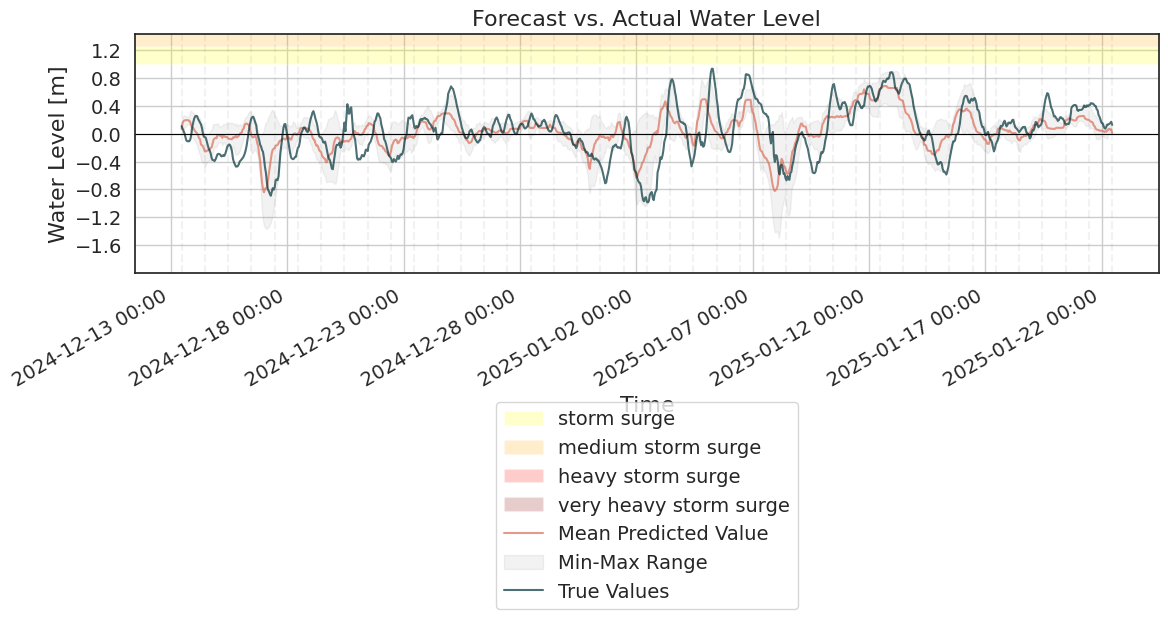

y_pred shape: (961, 24)
y_true shape: (961, 24)
mae shape: (961, 24)
[0.1541071  0.16022047 0.14754058 0.15634613 0.15439142 0.16516763
 0.15238352 0.1641178  0.15685661 0.161588   0.15108886 0.16630085
 0.17293751 0.18861747 0.18989947 0.20026146 0.21706371 0.22450991
 0.2344496  0.2419644  0.24526364 0.2566518  0.2652403  0.27244815]
Mean Absolute Error: 0.19164234


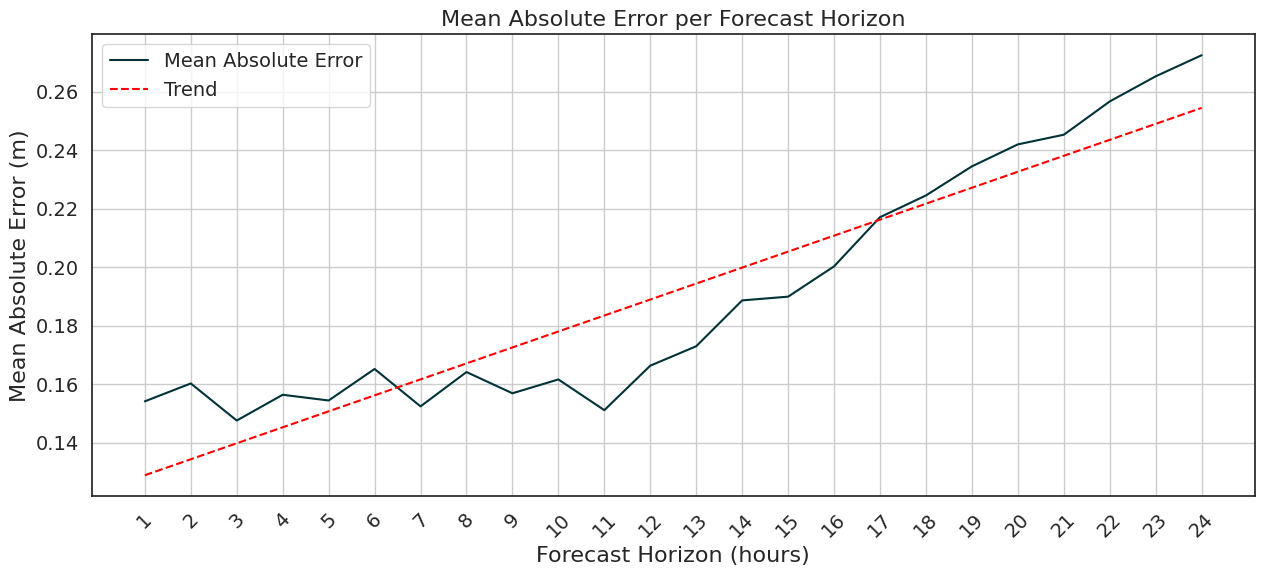

Number of blocks: 961, HORIZON: 24


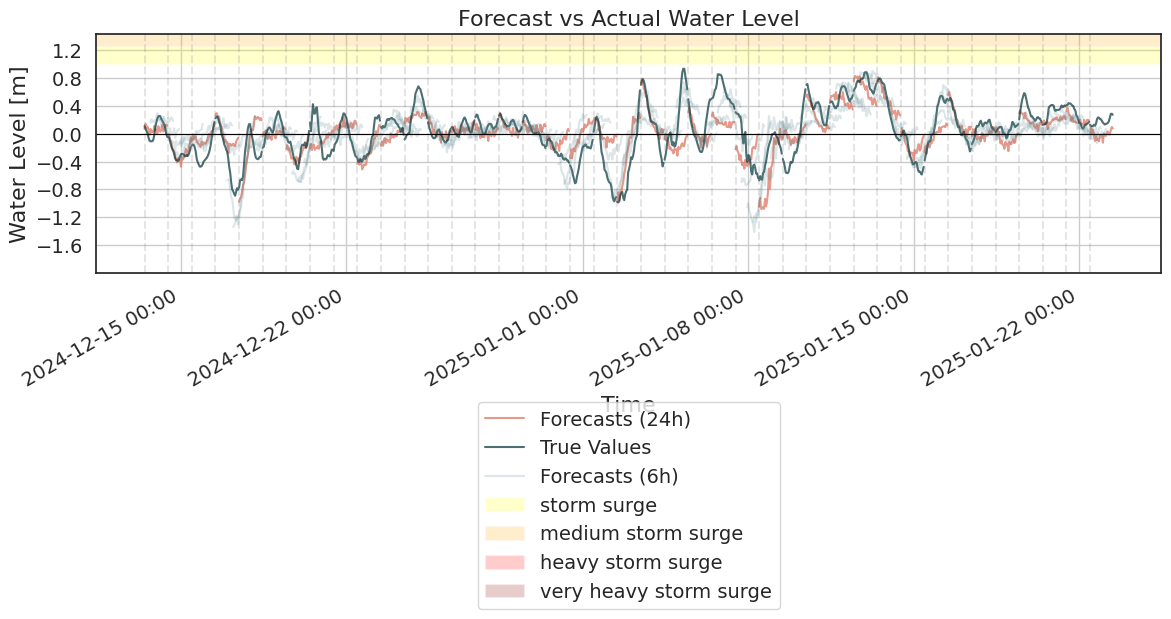

fold    MSE   RMSE    MAE  Recall  Precision     F1  Accuracy  \
0   Surge1  0.124  0.352  0.260   0.497      0.500  0.498     0.994   
1   Surge2  0.031  0.176  0.135   0.496      0.500  0.498     0.993   
2   Surge3  0.150  0.388  0.266   0.413      0.241  0.253     0.945   
3   Surge4  0.095  0.309  0.210   0.417      0.222  0.224     0.945   
4   Surge5  0.081  0.285  0.218   0.663      0.506  0.505     0.975   
5   Surge6  0.056  0.237  0.176   0.471      0.450  0.443     0.963   
6   Surge7  0.043  0.208  0.158   0.498      0.500  0.499     0.997   
7  normal1  0.026  0.161  0.123   1.000      1.000  1.000     1.000   
8  normal2  0.024  0.155  0.122   1.000      1.000  1.000     1.000   
9  normal3  0.065  0.256  0.192   1.000      1.000  1.000     1.000   

   Custom Score  Time Prediction [s]  Num Parameters  
0         0.387             0.009311        88987928  
1         0.359             0.008943        88987928  
2         0.576             0.012795        88987928  
3         0.573             0.015168        88987928  
4         0.370             0.014105        88987928  
5         0.402             0.013968        88987928  
6         0.363             0.016692        88987928  
7         0.008             0.015157        88987928  
8         0.007             0.015584        88987928  
9         0.020             0.013211        88987928

MSE    RMSE    MAE  Recall  Precision     F1  Accuracy  Custom Score  \
0  0.0695  0.2527  0.186  0.6455     0.5919  0.592    0.9812        0.3065   

   Time Prediction [s]  Num Parameters  
0             0.013493      88987928.0

y_pred shape: (9610, 24)
y_true shape: (9610, 24)
mae shape: (9610, 24)
[0.16758838 0.16412032 0.1619947  0.15850984 0.1600233  0.16025735
 0.1569971  0.16678968 0.16190168 0.16896664 0.1743991  0.17267774
 0.17775565 0.17840163 0.19656949 0.19747232 0.19932257 0.20337741
 0.20670335 0.21438877 0.22877349 0.22554319 0.22876619 0.2321004 ]
Mean Absolute Error: 0.18597503


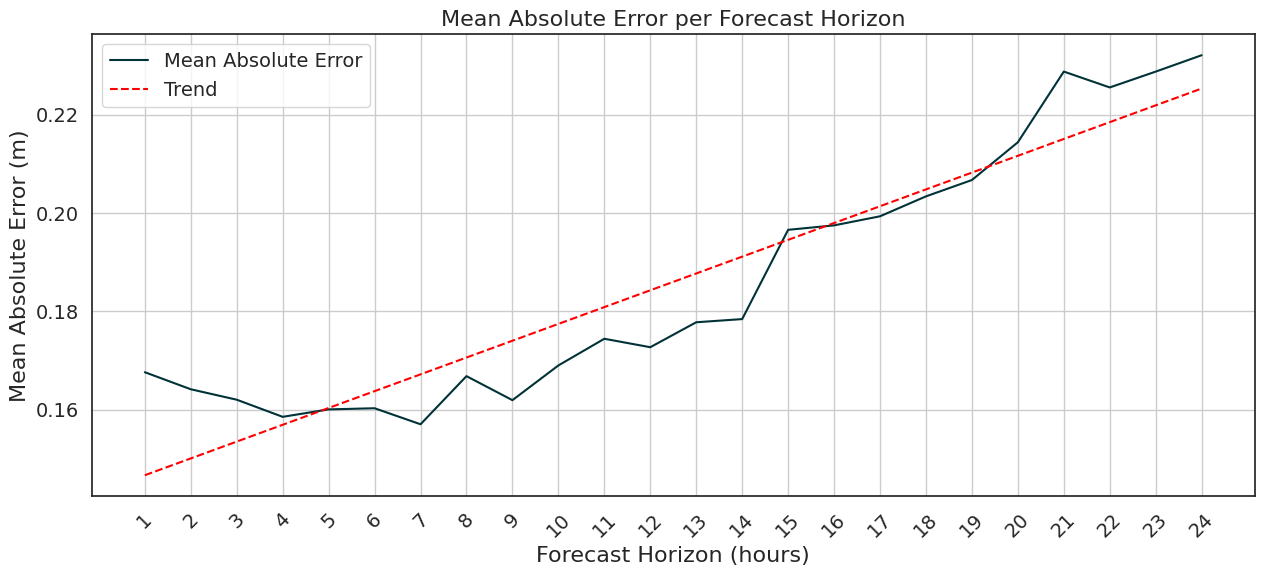

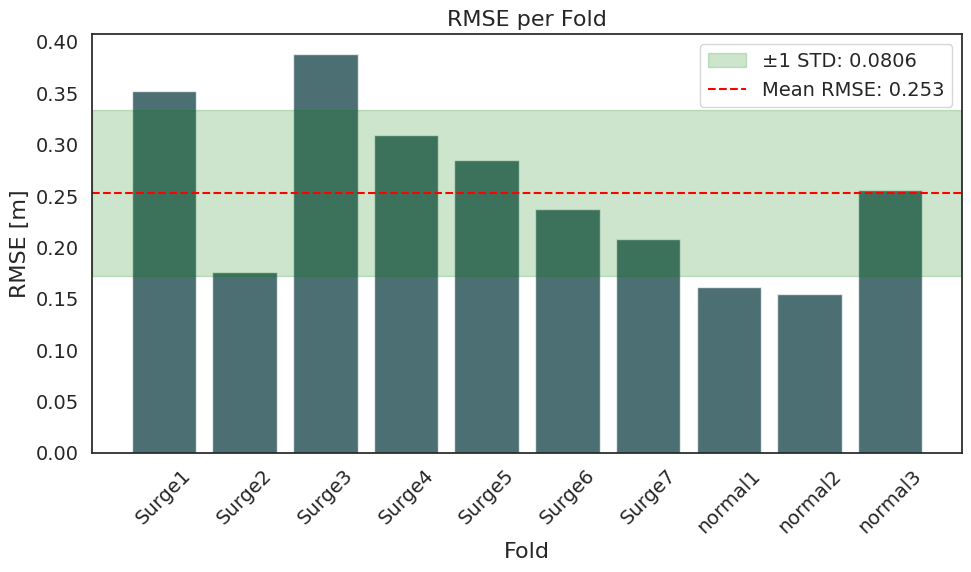

In [ ]:
from utils.config import (PRED_COLOR, TRUE_COLOR)
import matplotlib.dates as mdates

# Cross-Validation Zeitpunkte
folds = {
    "Surge1": pd.Timestamp("2023-02-25 16:00:00"),
    "Surge2": pd.Timestamp("2023-04-01 09:00:00"),
    "Surge3": pd.Timestamp("2023-10-07 20:00:00"),
    "Surge4": pd.Timestamp("2023-10-20 21:00:00"),
    "Surge5": pd.Timestamp("2024-01-03 01:00:00"),
    "Surge6": pd.Timestamp("2024-02-09 15:00:00"),
    "Surge7": pd.Timestamp("2024-12-09 10:00:00"),
    "normal1": pd.Timestamp("2023-07-01 14:00:00"),
    "normal2": pd.Timestamp("2024-04-01 18:00:00"),
    "normal3": pd.Timestamp("2025-01-01 12:00:00"),
}


study = optuna.load_study(study_name=study_name, storage=storage)
best_params = study.best_params
best_params["epochs"] = 1000  # Optional: Set epochs explicitly

# print("Verwende beste Parameter:", best_params)
# trial_number = 508  # z. B. Trial Nr. 17
# best_params = study.trials[trial_number].params
print(best_params)

use_cat = False
for key, value in best_params.items():
    if "_cat" in key:
        use_cat = True


if classification:
    best_model = CNNLSTM_Regression_Classification(
        in_channels=13,
        forecast_horizon=HORIZON,
        lagged_input_dim=24,
        H=25,
        W=25,
        cnn1_out_channels=best_params["cnn1_out_channels_cat"] if use_cat else best_params["cnn1_out_channels"],
        cnn2_out_channels=best_params["cnn2_out_channels_cat"] if use_cat else best_params["cnn2_out_channels"],
        cnn1_kernel_size=best_params["cnn1_kernel_size_cat"] if use_cat else best_params["cnn1_kernel_size"],
        cnn1_padding=best_params["cnn1_padding_cat"] if use_cat else best_params["cnn1_padding"],
        cnn2_kernel_size=best_params["cnn2_kernel_size_cat"] if use_cat else best_params["cnn2_kernel_size"],
        cnn2_padding=best_params["cnn2_padding_cat"] if use_cat else best_params["cnn2_padding"],
        cnn_linear_out_features=best_params["cnn_linear_out_features_cat"] if use_cat else best_params["cnn_linear_out_features"],
        lstm_hidden_dim=best_params["lstm_hidden_dim_cat"] if use_cat else best_params["lstm_hidden_dim"],
        lstm_layers=best_params["lstm_layers"],
        lstm_input_size=best_params["lstm_input_size_cat"] if use_cat else best_params["lstm_input_size"],
        dropout=best_params["dropout"]
    )
else:
    best_model = CNNLSTM_Regression(
        in_channels=13,
        forecast_horizon=HORIZON,
        lagged_input_dim=24,
        H=25,
        W=25,
        cnn1_out_channels=best_params["cnn1_out_channels_cat"] if use_cat else best_params["cnn1_out_channels"],
        cnn2_out_channels=best_params["cnn2_out_channels_cat"] if use_cat else best_params["cnn2_out_channels"],
        cnn1_kernel_size=best_params["cnn1_kernel_size_cat"] if use_cat else best_params["cnn1_kernel_size"],
        cnn1_padding=best_params["cnn1_padding_cat"] if use_cat else best_params["cnn1_padding"],
        cnn2_kernel_size=best_params["cnn2_kernel_size_cat"] if use_cat else best_params["cnn2_kernel_size"],
        cnn2_padding=best_params["cnn2_padding_cat"] if use_cat else best_params["cnn2_padding"],
        cnn_linear_out_features=best_params["cnn_linear_out_features_cat"] if use_cat else best_params["cnn_linear_out_features"],
        lstm_hidden_dim=best_params["lstm_hidden_dim_cat"] if use_cat else best_params["lstm_hidden_dim"],
        lstm_layers=best_params["lstm_layers"],
        lstm_input_size=best_params["lstm_input_size_cat"] if use_cat else best_params["lstm_input_size"],
        dropout=best_params["dropout"]
    )

#checkpoint = torch.load(f"models/Versuch3_final_conv_lstm_model_{surge_name}_classification={classification}.pt", map_location=torch.device('cpu'))
# for key, value in checkpoint.items():
#     print(f"{key}: {value.shape}")

# Versuch3_final_conv_lstm_model_Surge5_classification=True.pt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import matplotlib.dates as mdates

from matplotlib.figure import Figure
from matplotlib.axes import Axes
from datetime import datetime
from utils.config import (PRED_COLOR, TRUE_COLOR)

def plot_interval_forecasts(y_pred_test, y_test, time_index, HORIZON=HORIZON, title="Forecast vs Actual Water Level"):

    start_date = time_index[0]  # anpassen auf deinen tatsächlichen Startzeitpunkt

    # ---------------------------
    fig: Figure
    ax: Axes
    fig, ax = plt.subplots(figsize=(12, 8))

    # Anzahl der Blöcke
    num_blocks = y_pred_test.shape[0]
    print(f"Number of blocks: {num_blocks}, HORIZON: {HORIZON}")

    # Zeitindex erzeugen: vorhandene timestamps oder stündlich ab start_date
    total_length = num_blocks + HORIZON  # damit auch das letzte Blockfenster abgedeckt ist

    time_index = pd.date_range(start=start_date, periods=total_length, freq="H")  # stündlich

    # Highlight storm surge classes with colored bands
    flood_levels = [
        (1.0, 1.25, 'yellow', 'storm surge'),
        (1.25, 1.5, 'orange', 'medium storm surge'),
        (1.5, 2.0, 'red', 'heavy storm surge'),
        (2.0, 3.5, 'darkred', 'very heavy storm surge'),
    ]



    # Plotte alle 24-Stunden-Blöcke mit Datum auf der x-Achse
    for idx, i in enumerate(range(0, num_blocks, 24)):
        y_pred_block = y_pred_test[i].numpy()
        y_true_block = y_test[i]

        x_block = time_index[i : i + HORIZON]
        ax.plot(x_block, y_pred_block,
                label='Forecasts (24h)' if i == 0 else "", color=PRED_COLOR, alpha=0.7)
        ax.plot(x_block, y_true_block,
                label='True Values' if i == 0 else "", color=TRUE_COLOR, alpha=0.7)

    # Optional: zusätzliche Vorhersagen (z.B. alle 12h) mit eigener Farbe
    def plot_additional_predictions(y_pred_test, step, color='green'):
        for i in range(0, num_blocks, step):
            if i % 24 == 0:
                continue  # Already plotted above
            y_pred_block = y_pred_test[i].numpy()
            x_block = time_index[i : i + HORIZON]
            label = f'Forecasts ({step}h)' if i == step else ""
            ax.plot(x_block, y_pred_block,
                    label=label, color=color, alpha=0.2)

    # Beispielaufrufe (auskommentieren oder anpassen)
    #plot_additional_predictions(y_pred_test, step=12, color='#00607b')
    plot_additional_predictions(y_pred_test, step=6, color='#527f87')
    #plot_additional_predictions(y_pred_test, step=16, color='#bdd5c8')

    # Flood level Background
    for y0, y1, color, label in flood_levels:
        ax.axhspan(y0, y1, facecolor=color, alpha=0.2, label=label)

    # Vertikale Linien zur Markierung (z.B. Beginn jeder 24h-Periode)
    for i in range(0, num_blocks, 24):
        ax.axvline(x=time_index[i], color='gray', linestyle='--', alpha=0.2)

    # Null-Linie
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

    # Achsenbeschriftung & Titel
    ax.set_xlabel("Time")
    ax.set_ylabel("Water Level [m]")
    ax.set_title(title)

    # y-Limits basierend auf Daten
    y_min = min(y_test.min(), y_pred_test.min())
    y_max = max(y_test.max(), y_pred_test.max())
    ax.set_ylim(y_min - 0.5, y_max + 0.5)

    # Achsen-Ticks lesbar machen
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    fig.autofmt_xdate()

    # Legende ohne Duplikate
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.5))

    ax.grid(True)
    plt.tight_layout()
    start_date = time_index[0]  # anpassen auf deinen tatsächlichen Startzeitpunkt
    end_date = time_index[-1]  # anpassen auf deinen tatsächlichen Endzeitpunkt
    plt.savefig(f"../thesis_plots/Versuch3_DL_plot_interval_forecasts_{start_date}_{end_date}_classification={classification}_lightmode={light_mode}.png", dpi=300)
    plt.show()


def plot_forecast_error(y_pred:np.ndarray, y_true:np.ndarray):

    from numpy.polynomial.polynomial import polyfit

    print("y_pred shape:", y_pred.shape)
    print("y_true shape:", y_true.shape)

    mae = np.abs(y_true - y_pred)
    print("mae shape:", mae.shape)

    mae_mean = np.mean(mae, axis=0)
    std_mae_mean = np.std(mae, axis=0)
    print(mae_mean)

    mean_error = np.mean(mae_mean)
    print("Mean Absolute Error:", mean_error)

    # X-Achse: Forecast Horizon (1 bis 24)
    x = np.arange(1, len(mae_mean) + 1)

    # Fit: Polynom 1. Ordnung
    coeffs = np.polyfit(x, mae_mean, deg=1)
    trend_linear = np.polyval(coeffs, x)

    plt.figure(figsize=(15, 6))
    plt.plot(x, mae_mean, label='Mean Absolute Error', color=TRUE_COLOR, alpha=1.0, )
    plt.plot(x, trend_linear, label='Trend', color='red', linestyle='--')

    # plt.axhline(y=mean_error, color='green', linestyle='--', label='Mean Error')

    plt.xlabel("Forecast Horizon (hours)")
    plt.ylabel("Mean Absolute Error (m)")
    plt.title("Mean Absolute Error per Forecast Horizon")
    plt.legend()
    plt.xticks(x, rotation=45)
    plt.grid()
    plt.savefig(f"../thesis_plots/Versuch3_DL_Mean_Absolute_Error_per_Forecast_Horizon_classification={classification}_lightmode={light_mode}.png", dpi=300)
    plt.show()


# === Custom score function ===
def plot_forecasts(y_pred: np.ndarray, y_true: np.ndarray, time_index: pd.DatetimeIndex, horizon=HORIZON):


    arr = np.full((y_pred.shape[0], y_pred.shape[0]), np.nan)
    for i in range(y_pred.shape[0]):
        y_pred_block = y_pred[i]
        max_horizon = min(y_pred_block.shape[0], arr.shape[1] - i)
        arr[i, i:i + max_horizon] = y_pred_block[:max_horizon]

    n_samples = np.sum(~np.isnan(arr), axis=1)
    n_samples_safe = np.where(n_samples == 0, np.nan, n_samples)

    arr_mean = np.nanmean(arr, axis=1)
    arr_std = np.nanstd(arr, axis=1)
    arr_ci95 = 1.96 * arr_std / np.sqrt(n_samples_safe)
    arr_ci99 = 2.576 * arr_std / np.sqrt(n_samples_safe)

    # calculateing the min max off arr
    arr_min = np.nanmin(arr, axis=1)
    arr_max = np.nanmax(arr, axis=1)

    # Hier: nur die „direkten“ echten Werte nehmen
    if y_true.ndim == 2:
        y_true_all = y_true[:, 0]  # nehme nur ersten Horizontwert pro Sample
    else:
        y_true_all = y_true  # falls schon 1D

    # Highlight storm surge classes with colored bands
    flood_levels = [
        (1.0, 1.25, 'yellow', 'storm surge'),
        (1.25, 1.5, 'orange', 'medium storm surge'),
        (1.5, 2.0, 'red', 'heavy storm surge'),
        (2.0, 3.5, 'darkred', 'very heavy storm surge'),
    ]

    from matplotlib.figure import Figure
    from matplotlib.axes import Axes

    fig: Figure
    ax: Axes
    fig, ax = plt.subplots(figsize=(12, 8))

    for y0, y1, color, label in flood_levels:
        ax.axhspan(y0, y1, facecolor=color, alpha=0.2, label=label)

    
    ax.plot(time_index, arr_mean, label='Mean Predicted Value', color=PRED_COLOR, alpha=0.7)

    # plt.fill_between(
    #     time_index,
    #     arr_mean - arr_ci95,
    #     arr_mean + arr_ci95,
    #     where=~np.isnan(arr_ci95),
    #     color='red',
    #     alpha=0.2,
    #     label='95% CI'
    # )

    # plt.fill_between(
    #     time_index,
    #     arr_mean - arr_std,
    #     arr_mean + arr_std,
    #     where=~np.isnan(arr_std),
    #     color='green',
    #     alpha=0.2,
    #     label='1 Std Dev'
    #)

    ax.fill_between(
        time_index,
        arr_min,
        arr_max,
        where=~np.isnan(arr_min) & ~np.isnan(arr_max),
        color='gray',
        alpha=0.1,
        label='Min-Max Range'
    )

    ax.plot(time_index, y_true_all, label='True Values', color=TRUE_COLOR, alpha=0.7)

    for i in range(0, len(arr_mean), 24):
        ax.axvline(x=time_index[i], color='gray', linestyle='--', alpha=0.1)

    y_min = min(y_true.min(), y_pred.min())
    y_max = max(y_true.max(), y_pred.max())

    ax.set_ylim(y_min - 0.5, y_max + 0.5)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

    ax.set_xlabel("Time")
    ax.set_ylabel("Water Level [m]")
    ax.set_title("Forecast vs. Actual Water Level")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(10)) # make y-axis labels readable
    ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # make x-axis labels readable
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    fig.autofmt_xdate()
    ax.grid(True)
    plt.tight_layout()
    start_date = time_index[0]  # anpassen auf deinen tatsächlichen Startzeitpunkt
    end_date = time_index[-1]  # anpassen auf deinen tatsächlichen Endzeitpunkt

    plt.savefig(f"../thesis_plots/Versuch3_DL_Forecast_vs_Actual_Water_Level_{start_date}_{end_date}_classification={classification}_lightmode={light_mode}.png", dpi=300)
    plt.show()


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# def custom_score(y_true, y_pred, bins=[1, 2.00], alpha=0.7):
#     recalls = []
#     for i in range(y_true.shape[1]):
#         y_true_class = np.digitize(y_true[:, i], bins=bins)
#         y_pred_class = np.digitize(y_pred[:, i], bins=bins)
#         print(f"y_true_class: {y_true_class}, \ny_pred_class: {y_pred_class}")
#         recalls.append(recall_score(y_true_class, y_pred_class, average="macro"))
#     mean_recall = np.mean(recalls)
#     mse = mean_squared_error(y_true, y_pred)
#     return alpha * (1 - mean_recall) + (1 - alpha) * mse

def custom_score(y_true, y_pred, bins=[1, 2.00], alpha=0.7):
    
    y_true_class = np.digitize(y_true, bins=bins)
    y_pred_class = np.digitize(y_pred, bins=bins)
    #print(f"y_true_class: {y_true_class}, \ny_pred_class: {y_pred_class}")
    recall = recall_score(y_true_class, y_pred_class, average="macro")
    
    mse = mean_squared_error(y_true, y_pred)
    return alpha * (1 - recall) + (1 - alpha) * mse

def calculate_class_scores(y_true, y_pred, bins=[1, 2.00]):

    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    y_true_class = np.digitize(y_true, bins=bins)
    y_pred_class = np.digitize(y_pred, bins=bins)
    recall = recall_score(y_true_class, y_pred_class, average="macro")
    precision = precision_score(y_true_class, y_pred_class, average="macro")
    f1 = f1_score(y_true_class, y_pred_class, average="macro")
    accuracy = accuracy_score(y_true_class, y_pred_class)

    return recall, precision, f1, accuracy

# === Run cross-validation with best parameters ===
result_df = pd.DataFrame()
results = []
y_true_all = []
y_pred_all = []
for surge_name, fold in folds.items():
    print(f"\n=== Fold: {surge_name} ===")

    start_cutoff = fold - pd.Timedelta(hours=168 * 4)
    end_cutoff = fold + pd.Timedelta(hours=168 * 4)
    idx_start_cutoff = np.where(common_time == start_cutoff)[0][0]
    idx_end_cutoff = np.where(common_time == end_cutoff)[0][0]

    X_test = X[idx_start_cutoff:idx_end_cutoff]
    y_lagged_test = y_lagged[idx_start_cutoff:idx_end_cutoff]
    y_test = y[idx_start_cutoff:idx_end_cutoff]

    X_train = X.copy()
    y_lagged_train = y_lagged.copy()
    y_train = y.copy()
    X_train[idx_start_cutoff:idx_end_cutoff] = np.nan
    y_lagged_train[idx_start_cutoff:idx_end_cutoff] = np.nan
    y_train[idx_start_cutoff:idx_end_cutoff] = np.nan

    X_train, y_lagged_train, y_train = create_sequences(X_train, y_lagged_train, y_train, SEQUENCE_LENGTH, HORIZON)
    X_test, y_lagged_test, y_test = create_sequences(X_test, y_lagged_test, y_test, SEQUENCE_LENGTH, HORIZON)

    gap = 168
    X_test = X_test[gap:-gap]
    y_lagged_test = y_lagged_test[gap:-gap]
    y_test = y_test[gap:-gap]

    n_features = X_test.shape[2]
    X_scalers = [joblib.load(f"models/Versuch3_X_scaler_cv_{i}_{surge_name}_classification={classification}_lightmode={light_mode}.pkl") for i in range(n_features)]
    # BackUP: "models/Versuch3_X_scaler_{i}_{surge_name}_classification={classification}.pkl"
    
    # Versuch3_X_scaler_0_Surge5_classification=True.pkl
    # Versuch3_y_lagged_scaler_Surge5_classification=True.pkl
    # BackUP: "models/Versuch3_y_lagged_scaler_{surge_name}_classification={classification}.pkl"
    y_lagged_scaler = joblib.load(f"models/Versuch3_y_lagged_scaler_cv_{surge_name}_classification={classification}_lightmode={light_mode}.pkl")
    
    

    # scale test data
    print(f"X_test shape: {X_test.shape}, y_lagged_test shape: {y_lagged_test.shape}, y_test shape: {y_test.shape}")
    X_test_sc = X_test.copy()
    X_train_sc = X_train.copy()
    for i in range(n_features):
        X_test_sc[:, :, i, :, :] = X_scalers[i].transform(X_test_sc[:, :, i, :, :].reshape(-1, 1)).reshape(X_test_sc[:, :, i, :, :].shape)
        X_train_sc[:, :, i, :, :] = X_scalers[i].transform(X_train_sc[:, :, i, :, :].reshape(-1, 1)).reshape(X_train_sc[:, :, i, :, :].shape)

    # scale y_lagged_test
    y_lagged_test_sc = y_lagged_scaler.transform(y_lagged_test.reshape(-1, 1)).reshape(y_lagged_test.shape)
    y_lagged_train_sc = y_lagged_scaler.transform(y_lagged_train.reshape(-1, 1)).reshape(y_lagged_train.shape)

    print(f"X_test_sc shape: {X_test_sc.shape}, y_lagged_test_sc shape: {y_lagged_test_sc.shape}, y_test shape: {y_test.shape}")
    print(f"X_train_sc shape: {X_train_sc.shape}, y_lagged_train_sc shape: {y_lagged_train_sc.shape}, y_train shape: {y_train.shape}")

    # convert to tensors
    X_test_tensor = torch.tensor(X_test_sc, dtype=torch.float32)
    y_lagged_test_tensor = torch.tensor(y_lagged_test_sc, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    X_train_tensor = torch.tensor(X_train_sc, dtype=torch.float32)
    y_lagged_train_tensor = torch.tensor(y_lagged_train_sc, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    # Lade die gespeicherten Parameter in das Modell
    best_model.load_state_dict(torch.load(f"models/Versuch3_final_conv_lstm_model_cv_{surge_name}_classification={classification}_lightmode={light_mode}.pt", map_location=torch.device('cpu')))
    # BackUP: "models/Versuch3_final_conv_lstm_model_{surge_name}_classification={classification}.pt"
    
    # Setze das Modell in den Evaluierungsmodus
    best_model.eval()
    # === Predict using the model ===
    
    with torch.no_grad():
        start_time = time.time()
        if classification:
            y_pred_test, class_pred_test = best_model.predict(X_test_tensor, y_lagged_test_tensor)
        else:
            y_pred_test = best_model.predict(X_test_tensor, y_lagged_test_tensor)
        end_time = time.time()
        print("Regression Output Shape:", y_pred_test.shape)
        #print("Classification Output Shape:", class_pred_test.shape)
        avg_time = (end_time - start_time) / y_pred_test.shape[0]
        # predict training data
        if classification:
            y_pred_train, class_pred_train = best_model.predict(X_train_tensor, y_lagged_train_tensor)
            print("Regression Output Shape (Train):", y_pred_train.shape)
            print("Classification Output Shape (Train):", class_pred_train.shape) 
        else:
            y_pred_train = best_model.predict(X_train_tensor, y_lagged_train_tensor)
            print("Regression Output Shape (Train):", y_pred_train.shape)
         

    mse = mean_squared_error(y_test_tensor.numpy().flatten(), y_pred_test.numpy().flatten())
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_tensor.numpy().flatten(), y_pred_test.numpy().flatten())
    recall, precision, f1, accuracy = calculate_class_scores(y_pred_test.numpy().flatten(), y_test.flatten(), bins=[1, 1.25, 1.5, 2.0])
    custom_score_value = custom_score(y_true=y_test_tensor.numpy().flatten(), y_pred=y_pred_test.numpy().flatten(), bins=[1, 1.25, 1.5, 2.0], alpha=0.7)
    time_index = common_time[idx_start_cutoff + gap : idx_end_cutoff - gap]
    time_index = time_index[-X_test.shape[0]:]  # nur die letzten N, passend zu X_test


    y_true_all.append(y_test_tensor.numpy())
    y_pred_all.append(y_pred_test.numpy())
    plot_forecasts(y_pred_test.numpy(), y_test, time_index=time_index, horizon=HORIZON)
    plot_forecast_error(y_pred_test.numpy(), y_test)
    plot_interval_forecasts(y_pred_test, y_test, time_index, HORIZON=HORIZON)


    num_params = count_parameters(best_model)
    result_df = pd.concat([
        result_df,
        pd.DataFrame({
            "fold": [surge_name],
            "MSE": [round(mse,3)],
            "RMSE": [round(rmse,3)],
            "MAE": [round(mae,3)],
            "Recall": [round(recall,3)],
            "Precision": [round(precision,3)],
            "F1": [round(f1,3)],
            "Accuracy": [round(accuracy,3)],
            "Custom Score": [round(custom_score_value,3)],
            "Time Prediction [s]": [avg_time],
            "Num Parameters": [num_params],
        })
    ], ignore_index=True) 
     
display(result_df)
result_df.to_csv(f"../thesis_plots/Versuch3_DL_results_classification={classification}_lightmode={light_mode}.csv", index=False)
# calculate the mean of the result_df
mean_results = result_df.mean(numeric_only=True).to_frame().T
display(mean_results)
y_true_all_np = np.array(y_true_all).reshape(-1, y_true_all[0].shape[1])
y_pred_all_np = np.array(y_pred_all).reshape(-1, y_pred_all[0].shape[1])

#np.array(y_true_all).shape, np.array(y_pred_all).shape

plot_forecast_error(y_pred_all_np, y_true_all_np)


# BARPLOT
# plot barplot
fig = plt.figure(figsize=(10, 6))
plt.bar(result_df['fold'], result_df['RMSE'], color=TRUE_COLOR, alpha=0.7)
rmse = result_df['RMSE'].mean()
std_value = result_df['RMSE'].std()

plt.axhspan(rmse - std_value, rmse + std_value, 
            color='green', alpha=0.2, 
            label=f'±1 STD: {std_value:.4f}')

plt.axhline(rmse, color='red', linestyle='--', label=f'Mean RMSE: {rmse:.3f}')
plt.legend()
plt.xlabel('Fold')
plt.ylabel('RMSE [m]')
plt.title('RMSE per Fold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"../thesis_plots/Versuch3_DL_RMSE_per_Fold_classification={classification}_lightmode={light_mode}.png", dpi=300)
plt.show()

# Archive

# Versuch 1 DL

In [ ]:

# Standard Libraries
import warnings

# Scientific Libraries
import numpy as np
import optuna
import pandas as pd
import torch
import time
from sklearn.metrics import mean_squared_error, recall_score

# Sklearn
from sklearn.preprocessing import StandardScaler

# Torch Tools
from torch.utils.tensorboard import SummaryWriter

# Custom Utilities
from utils.dl_helper_functions import (
    convert_to_tensors,
    create_sequences,
    load_picture_lagged_data,
    scale_data,
    create_nowcasting_sequences
)
from utils.Model_ConvLSTM import CNNLSTM_Regression_Classification
from utils.Model_Training import training_ConvLSTM_Regression_Classification

# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Suppress specific warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# Display all columns in pandas
pd.options.display.max_columns = None

# TensorBoard writer
#writer = SummaryWriter()

# Define global constants
DTYPE_NUMPY = np.float32              # Datentyp für numpy Arrays
n_jobs = -1                           # Anzahl CPUs für parallele Prozesse
HORIZON = 1                      # 1 Tage Vorhersagehorizont
SEQUENCE_LENGTH = 24              # 1 Tag als Input-Sequenz



storage = "sqlite:///Versuch1_ConvLSTM_CustomScore.db"  # Speicherort für Optuna Studien
study_name = f"{HORIZON}"


classification = False
light_mode = False

if classification:
    print("Classification Mode: Using custom score with bins [1, 2.00]")
else:
    print("Regression Mode: Using mean squared error as loss function")

if light_mode:
    print("Light Mode: Using reduced dataset for faster training")
else:
    print("Full Mode: Using full dataset for training")

if classification:
    storage = f"sqlite:///Versuch3_ConvLSTM_CustomScore_cv_light_mode={light_mode}.db"  # Speicherort für Optuna Studien
else:
    storage = f"sqlite:///Versuch3_ConvLSTM_Regression_cv_light_mode={light_mode}.db"



# print which device is used
if torch.cuda.is_available():
    print("Using GPU:", torch.cuda.get_device_name(0))
    gpu_name = torch.cuda.get_device_name(0)
else:
    gpu_name = "CPU"
    print("Using CPU")



# Load data
X, y_lagged, y, common_time = load_picture_lagged_data(
    return_common_time=True,
    verbose=False,
    grid_size=25,
    n_jobs=n_jobs,
    dtype=DTYPE_NUMPY,
    pca=False,
    keep_ocean_data=True,
    land_values=0.0,
    light_mode=light_mode
)


# Daten vorbereiten
X = X.astype(DTYPE_NUMPY)
y_lagged = y_lagged.astype(DTYPE_NUMPY)
y = y.astype(DTYPE_NUMPY)




Interpolating sla: 100%|██████████| 20161/20161 [00:02<00:00, 7137.94it/s]


In [ ]:
# Cross-Validation Zeitpunkte
folds = {
    # "Surge1": pd.Timestamp("2023-02-25 16:00:00"),
    # "Surge2": pd.Timestamp("2023-04-01 09:00:00"),
    # "Surge3": pd.Timestamp("2023-10-07 20:00:00"),
    # "Surge4": pd.Timestamp("2023-10-20 21:00:00"),
    "Surge5": pd.Timestamp("2024-01-03 01:00:00"),
    # "Surge6": pd.Timestamp("2024-02-09 15:00:00"),
    # "Surge7": pd.Timestamp("2024-12-09 10:00:00"),
    # "normal1": pd.Timestamp("2023-07-01 14:00:00"),
    # "normal2": pd.Timestamp("2024-04-01 18:00:00"),
    # "normal3": pd.Timestamp("2025-01-01 12:00:00"),
}

best_params = optuna.load_study(
    storage=storage,
    study_name=study_name,
).best_params

print("Beste Parameter:", best_params)
# print best score
print("Beste Score:", optuna.load_study(
    storage=storage,
    study_name=study_name,
).best_value)

Beste Parameter: {'cnn1_out_channels': 128, 'cnn2_out_channels': 64, 'cnn_linear_out_features': 224, 'lstm_hidden_dim': 400, 'lstm_layers': 3, 'dropout': 0.256805613549574, 'lr': 0.0001142924116064425}
Beste Score: 0.2986559276406963


In [ ]:

def custom_score(y_true=None, y_pred=None, bins=[1, 2.00], alpha=0.7):

    # Falls y_true oder y_pred 1D sind, füge eine Dimension hinzu
    if y_true.ndim == 1:
        y_true = y_true[:, np.newaxis]
    if y_pred.ndim == 1:
        y_pred = y_pred[:, np.newaxis]
    
    # Initialisiere Recall- und MSE-Werte
    recalls = []
    for i in range(y_true.shape[1]):  # Iteriere über jede Spalte
        y_true_class = np.digitize(y_true[:, i], bins=bins)
        y_pred_class = np.digitize(y_pred[:, i], bins=bins)
        recalls.append(recall_score(y_true_class, y_pred_class, average="macro"))
    
    mean_recall = np.mean(recalls)  # Durchschnittlicher Recall
    mse = mean_squared_error(y_true, y_pred)
    return alpha * (1 - mean_recall) + (1 - alpha) * mse

fold_results = []

for surge_name, fold in folds.items():
    start_cutoff = fold - pd.Timedelta(hours=168 * 4)
    end_cutoff = fold + pd.Timedelta(hours=168 * 4)
    idx_start_cutoff = np.where(common_time == start_cutoff)[0][0]
    idx_end_cutoff = np.where(common_time == end_cutoff)[0][0]

    X_test = X[idx_start_cutoff:idx_end_cutoff]
    y_lagged_test = y_lagged[idx_start_cutoff:idx_end_cutoff]
    y_test = y[idx_start_cutoff:idx_end_cutoff]

    X_train = X.copy()
    y_lagged_train = y_lagged.copy()
    y_train = y.copy()
    X_train[idx_start_cutoff:idx_end_cutoff] = np.nan
    y_lagged_train[idx_start_cutoff:idx_end_cutoff] = np.nan
    y_train[idx_start_cutoff:idx_end_cutoff] = np.nan

    X_train, y_lagged_train, y_train = create_nowcasting_sequences(X_train, y_lagged_train, y_train, SEQUENCE_LENGTH)
    X_test, y_lagged_test, y_test = create_nowcasting_sequences(X_test, y_lagged_test, y_test, SEQUENCE_LENGTH)

    gap = 168
    X_test = X_test[gap:-gap]
    y_lagged_test = y_lagged_test[gap:-gap]
    y_test = y_test[gap:-gap]

    assert not np.isnan(X_train).any(), "X_train enthält NaN-Werte."
    assert not np.isnan(y_train).any(), "y_train enthält NaN-Werte."


    X_train, y_lagged_train, y_train, _, _, _, X_test, y_lagged_test, y_test, X_scalers, y_lagged_scalers = scale_data(
        X_train=X_train, y_lagged_train=y_lagged_train, y_train=y_train,
        X_val=None, y_lagged_val=None, y_val=None,
        X_test=X_test, y_lagged_test=y_lagged_test, y_test=y_test,
        dtype=DTYPE_NUMPY, verbose=False
    )

    X_train_tensor, y_lagged_train_tensor, y_train_tensor, _, _, _, X_test_tensor, y_lagged_test_tensor, y_test_tensor = convert_to_tensors(
        X_train=X_train, y_lagged_train=y_lagged_train, y_train=y_train,
        X_val=None, y_lagged_val=None, y_val=None,
        X_test=X_test, y_lagged_test=y_lagged_test, y_test=y_test,
        dtype=torch.float32
    )

    model = CNNLSTM_Regression_Classification(
        in_channels=X_train_tensor.shape[2],
        forecast_horizon=HORIZON,
        lagged_input_dim=y_lagged_train_tensor.shape[2],
        H=X_train_tensor.shape[3],
        W=X_train_tensor.shape[4],
        cnn1_out_channels=best_params["cnn1_out_channels"],
        cnn2_out_channels=best_params["cnn2_out_channels"],
        cnn1_kernel_size=3,
        cnn1_padding=1,
        cnn2_kernel_size=3,
        cnn2_padding=1,
        cnn_linear_out_features=best_params["cnn_linear_out_features"],
        lstm_hidden_dim=best_params["lstm_hidden_dim"],
        lstm_layers=best_params["lstm_layers"],
        lstm_input_size=best_params["cnn_linear_out_features"],
        dropout=best_params["dropout"]
    )

    optimizer = torch.optim.Adam(model.parameters(), lr=best_params["lr"])

    best_model = training_ConvLSTM_Regression_Classification(
        model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        X_val=X_test_tensor,
        y_val=y_test_tensor,
        y_lagged_train=y_lagged_train_tensor,
        y_lagged_val=y_lagged_test_tensor,
        epochs=1000,
        batch_size=256,
        optimizer=optimizer,
        writer=None,
        verbose=True,
        log_tensorboard=False,
        patience=40,
        trial=None,
        use_amp=False
    )

    model.eval()
    with torch.no_grad():
        y_pred, _ = model.predict(X_test_tensor, y_lagged_test_tensor)
        y_pred = y_pred.cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()
        
        
    print(f"Fold: {surge_name}, y_pred shape: {y_pred.shape}, y_true shape: {y_true.shape}")
    score = custom_score(y_true=y_true, y_pred=y_pred, bins=[1.0, 2.00], alpha=0.7)
    fold_results.append(score)

    print(f"Fold: {surge_name}, Custom Score: {score:.4f}")





KeyboardInterrupt: 